<a href="https://colab.research.google.com/github/pedro-otalora/OAI2RDF/blob/main/colab/TFG_PIPELINE_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OAI2RDF**
## **TRANSFORMACIÓN DE METADATOS OAI-PMH A CONJUNTOS DE DATOS SEMÁNTICOS RDF EN REVISTAS CIENTÍFICAS Y REPOSITORIOS INSTITUCIONALES**

### CONFIGURACIÓN PARA EL PORTAL DE REVISTAS UM

[revistas.um.es](https://)

VERSION 5


# 0. CONFIGURACIÓN DIRECTORIO DE ARCHIVOS


## 0.1 Monta la carpeta de Drive y establece la variable PIPELINE con el directorio de trabajo

In [ ]:
### 0.1 Monta la carpeta de Drive y establece la variable PIPELINE con el directorio de trabajo

# importar liberías
from google.colab import drive


# montar Google Drive en Colab
drive.mount('/content/drive')

# ruta de archivos del proyecto
PIPELINE = "/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/"
TABLAS = PIPELINE + "TABLAS/"
LOGS = PIPELINE + "LOGS/"
XML = PIPELINE + "XML/"
REVISION = PIPELINE + "REVISION/"
GRAFICOS = PIPELINE + "GRAFICOS/"
TESAUROS = PIPELINE + "TESAUROS/"
RDFOUT = PIPELINE + "RDFOUT/"



Mounted at /content/drive


## 0.2 COMPROBAR SI EXISTEN LAS CARPETAS Y LOS RDF DE TESAUROS

Las carpetas deben estar creadas en la ruta especificada y los ficheros RDF de los tesauros en la carpeta TESAUROS.

Este script comprueba si los directorios están creados y si los rdf están disponibles. En caso contrario crea las carpetas necesarias y hace la descarga de los rdf

Ficheros de tesauros:
- unesco-thesaurus.rdf
https://vocabularies.unesco.org/exports/thesaurus/20201223-162019/unesco-thesaurus.rdf

- LEM.rdf http://id.sgcb.mcu.es/descarga/LEM.zip (descomprimir tras la descarga)


In [ ]:
### 0.2 COMPROBAR SI EXISTEN LAS CARPETAS Y LOS RDF DE TESAUROS

import os
import urllib.request

# Función para crear directorios
def crear_directorio(path, nombre):
    print(f"\n≡ Verificando {nombre} ≡")
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Directorio creado: {path}")
    else:
        print(f"Ya existe: {path}")

crear_directorio(PIPELINE, "Directorio raíz PIPELINE")
crear_directorio(os.path.join(PIPELINE, "TABLAS"), "TABLAS")
crear_directorio(os.path.join(PIPELINE, "LOGS"), "LOGS")
crear_directorio(os.path.join(PIPELINE, "XML"), "XML")
crear_directorio(os.path.join(PIPELINE, "REVISION"), "REVISION")
crear_directorio(os.path.join(PIPELINE, "GRAFICOS"), "GRAFICOS")
crear_directorio(os.path.join(PIPELINE, "TESAUROS"), "TESAUROS")
crear_directorio(os.path.join(PIPELINE, "RDFOUT"), "RDFOUT")

# Descargar tesauro UNESCO si no existe
print("\n" + "═"*40)
print("VERIFICANDO TESAURO UNESCO")
print("═"*40)

tesauro_path = os.path.join(PIPELINE, "TESAUROS/unesco-thesaurus.rdf")
url_tesauro = "https://vocabularies.unesco.org/exports/thesaurus/20201223-162019/unesco-thesaurus.rdf"

if os.path.isfile(tesauro_path):
    print(f"Archivo encontrado: {tesauro_path}")
else:
    print("Archivo no encontrado. Iniciando descarga...")
    try:
        urllib.request.urlretrieve(url_tesauro, tesauro_path)

        # Verificar nuevamente después de descargar
        if os.path.isfile(tesauro_path):
            print(f"Descarga exitosa: {tesauro_path}")
            print(f"Tamaño del archivo: {os.path.getsize(tesauro_path)/1024/1024:.2f} MB")
        else:
            print("Error: La descarga no se completó correctamente")

    except Exception as e:
        print(f"Error crítico durante la descarga: {str(e)}")
        print("Intenta descargarlo manualmente desde:")
        print(url_tesauro)

# Descargar y descomprimir LEM si no existe
print("\n" + "═"*40)
print("VERIFICANDO TESAURO LEM")
print("═"*40)

lem_path = os.path.join(TESAUROS, "LEM.rdf")
lem_zip_url = "http://id.sgcb.mcu.es/descarga/LEM.zip"
lem_zip_path = os.path.join(TESAUROS, "LEM.zip")

if os.path.isfile(lem_path):
    print(f"Archivo encontrado: {lem_path}")
else:
    print("Archivo LEM.rdf no encontrado. Iniciando descarga...")

    try:
        # Descargar el ZIP
        urllib.request.urlretrieve(lem_zip_url, lem_zip_path)
        print(f"ZIP descargado: {lem_zip_path}")

        # Descomprimir
        import zipfile
        with zipfile.ZipFile(lem_zip_path, 'r') as zip_ref:
            zip_ref.extractall(TESAUROS)
            print("Archivos descomprimidos")

            # Verificar si el RDF está en la raíz del ZIP o en subdirectorios
            extracted_files = zip_ref.namelist()
            if 'LEM.rdf' not in extracted_files:
                # Buscar en subdirectorios
                for file in extracted_files:
                    if file.endswith('LEM.rdf'):
                        os.rename(
                            os.path.join(TESAUROS, file),
                            lem_path
                        )
                        print(f"Archivo movido a: {lem_path}")
                        break

        # Verificación final
        if os.path.isfile(lem_path):
            print(f"LEM.rdf disponible en: {lem_path}")
            # Limpiar archivo ZIP
            os.remove(lem_zip_path)
            print("Archivo ZIP eliminado")
        else:
            print("l archivo LEM.rdf no se encontró dentro del ZIP")

    except Exception as e:
        print(f"Error durante el proceso LEM: {str(e)}")
        print("Intenta descargarlo manualmente desde:")
        print(lem_zip_url)

print("\n" + "═"*40)
print("CONFIGURACIÓN COMPLETADA")
print("═"*40)



≡ Verificando Directorio raíz PIPELINE ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/

≡ Verificando TABLAS ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS

≡ Verificando LOGS ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/LOGS

≡ Verificando XML ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/XML

≡ Verificando REVISION ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/REVISION

≡ Verificando GRAFICOS ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/GRAFICOS

≡ Verificando TESAUROS ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TESAUROS

≡ Verificando RDFOUT ≡
Directorio creado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT

════════════════════════════════════════
VERIFICANDO TESAURO UNESCO
════════════════════════════════════════
Archivo no encontrado. Iniciando descarga...
Descarga exitosa: /content/drive/MyDrive/4º GICD/TFG/PI

# 1. EXTRACCIÓN DE DATOS Y LIMPIEZA DE DATOS

## 1.1 EXTRAER TABLA DE REVISTAS DESDE LA WEB


1.1 EXTRAER TABLA DE REVISTAS DESDE LA WEB

La publicación de revistas mediante OJS tiene una estructura habitual compuesta por una página principal desde la que se accede a las revistas publicadas en el repositorio.

Mediante la técnica web scraping se extraen desde el portal principal los puntos de acceso de cada revista que forma parte del repositorio

- Extrae la tabla de revistas mediante la lectura del código HTML.
- Desde la url principal se extrae el nombre y url de cada revista.
- Desde la url de cada revista se extraen los datos de DOI, ISSN e ISSN-E

Se crea la tabla revistas.csv que contiene las siguientes columnas:

| Revista_ID | Nombre | URL | Imagen | DOI | ISSN-E | ISSN-Impreso |
|------------|--------|-----|--------|-----|--------|--------------|



In [ ]:
## 1.1 EXTRAER TABLA DE REVISTAS DESDE LA WEB

# EXTRAE LOS DATOS DE LA TABLA REVISTAS
# DESDE LA URL PRINCIPAL: NOMBRE Y URL DE CADA REVISTA
# DESDE LA URL DE CADA REVISTA: DOI, ISSN, ISSN-E

import os
import requests
from bs4 import BeautifulSoup
import csv
import time
from datetime import datetime

# Configuración de rutas
CSV_FILE = os.path.join(TABLAS, 'revistas.csv')
TXT_FILE = os.path.join(LOGS, 'extraccion_tabla_revistas.txt')

# Headers personalizados para simular navegador
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept-Language': 'es-ES,es;q=0.9'
}

def normalizar_imagen_url(url):
    """Normaliza URLs de imágenes que contengan direcciones IPv6"""
    if url and '2001:720:1710:212::1:9' in url:
        return url.replace('2001:720:1710:212::1:9', 'revistas.um.es')
    return url

def extraer_datos_revista(li_element):
    try:
        # Extraer URL y nombre
        url = li_element.find('a', href=True)['href']
        nombre = li_element.find('h3').text.strip()

        # Extraer URL de la imagen y normalizar
        img_tag = li_element.find('img')
        imagen_url = img_tag['src'] if img_tag else None
        imagen_url = normalizar_imagen_url(imagen_url)

        # Extraer datos adicionales
        datos_adicionales = extraer_datos_adicionales(url)

        return {
            'Revista_ID': url.rstrip('/').split('/')[-1],
            'Nombre': nombre,
            'URL': url,
            'Imagen': imagen_url,
            'DOI': datos_adicionales['DOI'],
            'ISSN-E': datos_adicionales['ISSN-E'],
            'ISSN-Impreso': datos_adicionales['ISSN-Impreso']
        }
    except Exception as e:
        print(f"Error al extraer datos de revista: {e}")
        return None

def extraer_datos_adicionales(url):
    try:
        response = requests.get(url, headers=HEADERS, timeout=15)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extraer ISSN
        online_issn = soup.find('div', class_='online_issn_container')
        issn_e = online_issn.find('span', class_='number').text.strip() if online_issn else None

        print_issn = soup.find('div', class_='print_issn_container')
        issn_impreso = print_issn.find('span', class_='number').text.strip() if print_issn else None

        # Extraer y formatear DOI
        doi_container = soup.find('div', class_='editum_doi')
        doi = doi_container.find('span', class_='value').text.strip() if doi_container else None
        if doi and doi.startswith('10.'):
            doi = f'https://doi.org/{doi}'

        return {'DOI': doi, 'ISSN-E': issn_e, 'ISSN-Impreso': issn_impreso}

    except Exception as e:
        print(f"Error procesando {url}: {str(e)}")
        return {'DOI': None, 'ISSN-E': None, 'ISSN-Impreso': None}

def obtener_datos_web(url):
    try:
        response = requests.get(url, headers=HEADERS)
        soup = BeautifulSoup(response.content, 'html.parser')

        journals_div = soup.find('div', class_='journals')
        if journals_div:
            return [extraer_datos_revista(li) for li in journals_div.find_all('li', class_='has_thumb')]
        return []

    except Exception as e:
        print(f"Error general: {str(e)}")
        return []

def guardar_en_csv(datos, archivo):
    with open(archivo, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=[
            'Revista_ID', 'Nombre', 'URL', 'Imagen', 'DOI', 'ISSN-E', 'ISSN-Impreso'
        ])
        writer.writeheader()
        writer.writerows([d for d in datos if d])

def generar_resumen(datos):
    total = len(datos)
    con_imagen = sum(1 for d in datos if d['Imagen'])
    return f"""Resumen de extracción:
- Revistas procesadas: {total}
- Con imagen: {con_imagen}
- Sin imagen: {total - con_imagen}
- Con DOI: {sum(1 for d in datos if d['DOI'])}
- Con ISSN-E: {sum(1 for d in datos if d['ISSN-E'])}
- Con ISSN-Impreso: {sum(1 for d in datos if d['ISSN-Impreso'])}"""

def main():
    start = datetime.now()
    print("Iniciando extracción...")

    datos = obtener_datos_web('https://revistas.um.es/')
    datos_validos = [d for d in datos if d]

    if datos_validos:
        guardar_en_csv(datos_validos, CSV_FILE)
        resumen = generar_resumen(datos_validos)

        with open(TXT_FILE, 'w', encoding='utf-8') as f:
            f.write(f"{resumen}\n\nTiempo total: {datetime.now() - start}")

        print(f"Proceso completado. Datos guardados en {CSV_FILE}")
    else:
        print("No se encontraron datos válidos")

if __name__ == "__main__":
    main()



Iniciando extracción...
Proceso completado. Datos guardados en /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS/revistas.csv


## 1.2 EXTRAER XML DE ARTICULOS DESDE OAI-PMH

1.2 EXTRAER XML DE ARTICULOS DESDE OAI-PMH

A partir de los puntos de acceso extraidos, se extraen los metadatos de todas las revistas en formato XML y se guardan en un fichero único.

Se configura para extraer el formato oai_dc.

Se utiliza el verbo ListRecords
- Función: Recupera registros completos de metadatos en formato oai_dc (Dublin Core).

Se realiza un control de paginación de los resultados devueltos mediante el uso de resumptionToken.

No se añade nada al contenido al xml original.

Se añade control de errores para que no detenga la extracción si se producen errores.

Se observa que el atributo lang de los metadatos no está consignado adecuadamente en todos los registros, por lo que deberá tenerse en cuenta más adelante.

Pasos clave:
- Lee el archivo CSV (revistas.csv) que contiene URLs de revistas.

Para cada revista:

- Se conecta a su API OAI-PMH (estándar para compartir metadatos).

- Descarga registros de artículos en formato XML.

Filtra registros:

- Omite artículos marcados como "deleted" (eliminados).

- Excluye registros cuyo título contenga la palabra "revisores" (para evitar contenido no relevante).

Guarda los datos:

- Crea un archivo XML (articulos_oai_dc.xml) con todos los registros válidos.

- Genera un informe de log (extraccion_xml_articulos_oai_dc.txt) con estadísticas de la extracción.

In [ ]:
## 1.2 EXTRAER XML DE ARTICULOS DESDE OAI-PMH

# EXTRAE LOS REGISTROS OAI-PMH EN FORMATO XML
# LAS URL BASE PARA LA EXTRACCIÓN LAS COGE DE LA TABLA DE REVISTAS
# SE OMITEN LOS REGISTROS CON ESTADO "DELETED"

import os
import requests
import csv
import time
import xml.etree.ElementTree as ET
from datetime import datetime

# Archivos de entrada y salida
CSV_FILE = os.path.join(TABLAS, 'revistas.csv')
TXT_FILE = os.path.join(LOGS, 'extraccion_xml_articulos_oai_dc.txt')
XML_FILE = os.path.join(XML, 'articulos_oai_dc.xml')

def extract_raw_oai_pmh_to_xml(base_url, xml_file):
    """
    Extrae todos los registros OAI-PMH en formato oai_dc de una URL base y los guarda directamente en el archivo XML,
    excluyendo los registros eliminados.
    """
    url = f"{base_url}/oai?verb=ListRecords&metadataPrefix=oai_dc"
    record_count = 0
    error_count = 0
    deleted_count = 0
    max_retries = 3
    retry_count = 0
    filtered_count = 0

    while True:
        try:
            response = requests.get(url, timeout=30)
            response.raise_for_status()
            root = ET.fromstring(response.content)
            retry_count = 0  # Reiniciar contador si tiene éxito
        except (requests.exceptions.RequestException, ET.ParseError) as e:
            print(f"Error al obtener o analizar la respuesta XML: {e}")
            retry_count += 1
            if retry_count >= max_retries:
                print(f"Máximo número de reintentos alcanzado para {url}. Pasando al siguiente conjunto.")
                break
            print(f"Reintentando... (intento {retry_count} de {max_retries})")
            time.sleep(5)
            continue

        # Buscar todos los registros en el XML
        records = root.findall('.//{http://www.openarchives.org/OAI/2.0/}record')

        for record in records:
            # Verificar si el registro está marcado como eliminado
            header = record.find('.//{http://www.openarchives.org/OAI/2.0/}header')
            if header is not None and header.get('status') == 'deleted':
                deleted_count += 1
                continue  # Saltar este registro


            # --- NUEVO: Filtrar REVISORES por título ---
            # title_element = record.find('.//{http://purl.org/dc/elements/1.1/}title')

            titles = record.findall('.//{http://purl.org/dc/elements/1.1/}title')
            filter_titles = [t.text.strip().lower() for t in titles if t.text]

            # Si el título contiene "revisores" (case-insensitive), saltar el registro
            # if title_element is not None and title_element.text:
                 # title = title_element.text.strip().lower()
                 # if "revisores" in title:
                 # Si cualquier título contiene "revisores", filtrar el registro
            if any("revisores" in title for title in filter_titles):
                 filtered_count += 1
                 continue  # Saltar este registro
            # --


            record_count += 1
            try:
                with open(xml_file, 'a', encoding='utf-8') as file:
                    file.write(ET.tostring(record, encoding='unicode'))
            except Exception as e:
                error_count += 1
                print(f"Error al guardar el registro {record_count}: {e}")

        # Buscar el resumptionToken para continuar con la paginación
        resumption_token = root.find('.//{http://www.openarchives.org/OAI/2.0/}resumptionToken')
        if resumption_token is None or not resumption_token.text:
            break

        url = f"{base_url}/oai?verb=ListRecords&resumptionToken={resumption_token.text}"
        time.sleep(1)  # Pausa para no saturar el servidor

    return record_count, error_count, deleted_count, filtered_count


def process_revistas_from_csv(csv_file):
    """
    Procesa las URLs de revistas desde un archivo CSV y guarda los registros directamente en un archivo XML.
    """
    total_record_count = 0
    total_error_count = 0
    total_deleted_count = 0

    total_filtered_count = 0

    revista_count = 0
    resumen_extraccion = ""
    start_time = datetime.now()

    # Crear el archivo XML con la cabecera inicial
    with open(XML_FILE, 'w', encoding='utf-8') as file:
        file.write('<?xml version="1.0" encoding="UTF-8"?>\n')
        file.write('<OAI-PMH>\n')

    try:
        with open(csv_file, 'r', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                revista_count += 1
                revista_url = row['URL']
                nombre_revista = revista_url.split('/')[-1]
                print(f"Procesando revista {revista_count}: {nombre_revista} - {revista_url}")
                resumen_extraccion += f"Procesando revista {revista_count}: {nombre_revista} - {revista_url}\n"

                try:
                    # record_count, error_count, deleted_count = extract_raw_oai_pmh_to_xml(revista_url, XML_FILE)
                    record_count, error_count, deleted_count, filtered_count = extract_raw_oai_pmh_to_xml(revista_url, XML_FILE)
                    total_record_count += record_count
                    total_error_count += error_count
                    total_deleted_count += deleted_count

                    total_filtered_count += filtered_count

                    # print(f"  Total de registros extraídos: {record_count}")
                    # print(f"  Registros con errores: {error_count}")
                    # print(f"  Registros eliminados omitidos: {deleted_count}")
                    resumen_extraccion += f"  Total de registros extraídos: {record_count}\n"
                    resumen_extraccion += f"  Registros con errores: {error_count}\n"
                    resumen_extraccion += f"  Registros eliminados omitidos: {deleted_count}\n"
                    resumen_extraccion += f"  Registros filtrados por 'revisores': {filtered_count}\n"

                except Exception as e:
                    print(f"Error al procesar la revista {nombre_revista}: {e}")
                    resumen_extraccion += f"Error al procesar la revista {nombre_revista}: {e}\n"
                # print("---")
                resumen_extraccion += "---\n"

    except FileNotFoundError:
        print(f"Error: El archivo {csv_file} no se encuentra.")
        return

    # Cerrar la etiqueta raíz del archivo XML al final del proceso
    with open(XML_FILE, 'a', encoding='utf-8') as file:
        file.write('</OAI-PMH>\n')

    end_time = datetime.now()
    duration = end_time - start_time

    # Imprimir y guardar el resumen final
    resumen_final = f"\nResumen final:\n"
    resumen_final += f"Total de revistas procesadas: {revista_count}\n"
    resumen_final += f"Total de registros extraídos: {total_record_count}\n"
    resumen_final += f"Total de registros con errores: {total_error_count}\n"
    resumen_final += f"Total de registros eliminados omitidos: {total_deleted_count}\n"

    resumen_final += f"Total de registros filtrados por 'revisores': {total_filtered_count}\n"

    resumen_final += f"Tiempo total de ejecución: {duration}\n"

    print(resumen_final)
    resumen_extraccion += resumen_final

    try:
        with open(TXT_FILE, 'w', encoding='utf-8') as txtfile:
            txtfile.write(resumen_extraccion)
        print(f"Resumen guardado en {TXT_FILE}")
    except Exception as e:
        print(f"Error al guardar el resumen: {e}")


# Ejecución del script
print("Iniciando la extracción de datos de las revistas desde el CSV...")
process_revistas_from_csv(CSV_FILE)


Iniciando la extracción de datos de las revistas desde el CSV...
Procesando revista 1: analesbio - https://revistas.um.es/analesbio
Procesando revista 2: analesderecho - https://revistas.um.es/analesderecho
Procesando revista 3: analesdoc - https://revistas.um.es/analesdoc
Procesando revista 4: analesff - https://revistas.um.es/analesff
Procesando revista 5: analesps - https://revistas.um.es/analesps
Procesando revista 6: analesvet - https://revistas.um.es/analesvet
Procesando revista 7: ayc - https://revistas.um.es/ayc
Procesando revista 8: areas - https://revistas.um.es/areas
Procesando revista 9: reapi - https://revistas.um.es/reapi
Procesando revista 10: azarbe - https://revistas.um.es/azarbe
Procesando revista 11: azufre - https://revistas.um.es/azufre
Procesando revista 12: bioderecho - https://revistas.um.es/bioderecho
Procesando revista 13: cartaphilus - https://revistas.um.es/cartaphilus
Procesando revista 14: gesinfo - https://revistas.um.es/gesinfo
Procesando revista 15: cpd

## 1.3 CREACIÓN TABLA ARTÍCULOS_VOLUMENES




1.3 CREACIÓN TABLA ARTÍCULOS_VOLUMENES

**Objetivo del script: Extracción de metadatos de volúmenes**

Este script procesa los metadatos de artículos académicos para identificar y organizar la información relacionada con los volúmenes/ediciones de las revistas científicas.

- Extraer y estructurar datos sobre los volúmenes de publicación a partir del campo `dc:source` en los metadatos XML.

- Maneja formatos variables de `dc:source` en diferentes revistas.

- Se crea una función para que reporte los volúmenes que tengan menos de 3 artículos, para poder cotejar la uniformidad y normalización de números en el dataset.

---

**Flujo principal**  
1. **Entrada**:  
   - `articulos_oai_dc.xml`: Archivo XML con metadatos de artículos.

2. **Procesamiento**:  
   - Filtra información de volúmenes en español (`xml:lang="es-ES"`).
   - Ignora códigos ISSN (ej: `1234-5678`).
   - Divide el campo `source` en componentes (ej: "Vol. 5; Núm. 2 (2023)" → "Vol. 5; Núm. 2").

3. **Salidas**:  
   - `articulos_volumenes.csv`: Tabla con relación artículo-volumen-revista.
   - `creacion_tabla_articulos_volumenes.txt`: Reporte estadístico detallado.

---


**Ejemplo de CSV generado**  

| ns0_identifier          | Revista_ID | nombre_volumen        |
|-------------------------|------------|-----------------------|
| oai:revistaX.org/123    | revistaX   | Vol. 12; Núm. 3       |








In [ ]:
## 1.3 CREACIÓN TABLA ARTÍCULOS_VOLUMENES

import os
import xml.etree.ElementTree as ET
import pandas as pd
import re
from datetime import datetime

# Configuración de rutas
XML_FILE = os.path.join(XML, 'articulos_oai_dc.xml')
OUTPUT_CSV = os.path.join(TABLAS, 'articulos_volumenes.csv')
REPORTE_TXT = os.path.join(LOGS, 'creacion_tabla_articulos_volumenes.txt')

# Variable configurable para el umbral de artículos por volumen
UMBRAL_ARTICULOS = 3

namespaces = {
    'dc': 'http://purl.org/dc/elements/1.1/',
    'ns0': 'http://www.openarchives.org/OAI/2.0/',
    'xml': 'http://www.w3.org/XML/1998/namespace'
}

def procesar_source(record):
    # Buscar todos los dc:source con xml:lang="es-ES"
    sources_es = record.findall('.//dc:source[@xml:lang="es-ES"]', namespaces)

    # Si no hay en español, tomar todos los sources no ISSN
    if not sources_es:
        sources_es = [s for s in record.findall('.//dc:source', namespaces)
                     if not re.match(r'^\d{4}-\d{3}[\dXx]$', s.text.strip())]

    for source in sources_es:
        texto = source.text.strip() if source.text else ''
        if not texto:
            continue

        # Ignorar ISSN
        if re.match(r'^\d{4}-\d{3}[\dXx]$', texto):
            continue

        # Dividir hasta el segundo punto y coma si existen al menos dos
        partes = [p.strip() for p in texto.split(';') if p.strip()]

        if len(partes) >= 2:
            return '; '.join(partes[:2])
        return texto

    return None

def generar_reporte(df):
    reporte = []

    # Estadísticas generales
    total_articulos = len(df)
    volumenes_unicos = df['nombre_volumen'].nunique()
    sin_volumen = df['nombre_volumen'].isna().sum()

    reporte.append("═" * 50)
    reporte.append(f"Total de artículos procesados: {total_articulos}")
    reporte.append(f"Volúmenes únicos detectados: {volumenes_unicos}")
    reporte.append(f"Artículos sin volumen asignado: {sin_volumen}\n")

    # Conteo por revista
    reporte.append("Estadísticas por revista:")
    conteo_revistas = df.groupby('Revista_ID').agg(
        Total_Articulos=('Revista_ID', 'size'),
        Volumenes_Unicos=('nombre_volumen', 'nunique'),
        Sin_Volumen=('nombre_volumen', lambda x: x.isna().sum())
    ).reset_index()

    for _, row in conteo_revistas.iterrows():
        reporte.append(f"\nRevista {row['Revista_ID']}:")
        reporte.append(f"  - Artículos totales: {row['Total_Articulos']}")
        reporte.append(f"  - Volúmenes únicos: {row['Volumenes_Unicos']}")
        reporte.append(f"  - Artículos sin volumen: {row['Sin_Volumen']}")

    # Volúmenes con pocos artículos
    volumenes_escasos = df['nombre_volumen'].value_counts()[lambda x: x < UMBRAL_ARTICULOS]
    if not volumenes_escasos.empty:
        reporte.append("\n" + "═" * 50)
        reporte.append(f"Volúmenes con menos de {UMBRAL_ARTICULOS} artículos:")
        for vol, count in volumenes_escasos.items():
            reporte.append(f"  - {vol}: {count} artículos")

    return '\n'.join(reporte)

def main():
    start_time = datetime.now()

    # Procesar XML
    datos = []
    tree = ET.parse(XML_FILE)

    for record in tree.findall('.//ns0:record', namespaces):
        # Extraer identificadores
        ns0_id = record.find('.//ns0:identifier', namespaces).text
        identifier = next((id.text for id in record.findall('.//dc:identifier', namespaces)
                          if id.text and id.text.startswith("https://revistas.um.es/")), None)

        # Extraer Revista_ID desde la URL
        revista_id = identifier.split('/')[-4] if identifier else None

        # Procesar metadato source
        nombre_volumen = procesar_source(record)

        datos.append({
            'ns0_identifier': ns0_id,
            'Revista_ID': revista_id,
            'nombre_volumen': nombre_volumen
        })

    # Crear DataFrame y guardar CSV
    df = pd.DataFrame(datos)
    df.to_csv(OUTPUT_CSV, index=False, encoding='utf-8')

    # Generar y guardar reporte
    reporte = generar_reporte(df)
    with open(REPORTE_TXT, 'w', encoding='utf-8') as f:
        f.write(reporte)

    print(f"\nProcesamiento completado en {datetime.now() - start_time}")
    print(f"Archivo CSV generado: {OUTPUT_CSV}")
    print(f"Reporte guardado: {REPORTE_TXT}")

if __name__ == "__main__":
    main()



Procesamiento completado en 0:00:06.400784
Archivo CSV generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS/articulos_volumenes.csv
Reporte guardado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/LOGS/creacion_tabla_articulos_volumenes.txt


## 1.4 CREACIÓN TABLA NÚMEROS



1.4 CREACIÓN TABLA NÚMEROS

**Objetivo del script: Crear tabla de números de revistas**

Este script genera una tabla resumen con los números únicos de revista que hay, que se utilizará posteriormente para la clase número.

---

**Flujo principal**  
1. **Entrada**:  
   - `articulos_volumenes.csv`: Tabla con relación artículo-volumen-revista.

2. **Procesamiento**:  
   - Agrupa los artículos por combinación única de `Revista_ID` + `nombre_volumen`.
   - Cuenta el número de artículos en cada grupo.

3. **Salidas**:  
   - `numeros.csv`: Tabla consolidada con conteos por volumen.  
   - `creacion_tabla_numeros.txt`: Reporte estadístico básico.

---

**Ejemplo de CSV generado**

| Revista_ID | nombre_volumen      | count_articulos |
|------------|---------------------|-----------------|
| revistaX   | Vol. 12; Núm. 3     | 15              |
| revistaY   | 2023-Especial       | 8               |





In [ ]:
## 1.4 CREACIÓN TABLA NÚMEROS

import pandas as pd
import os
from datetime import datetime

INPUT_CSV = os.path.join(TABLAS, 'articulos_volumenes.csv')
OUTPUT_CSV = os.path.join(TABLAS, 'numeros.csv')
REPORTE_TXT = os.path.join(LOGS, 'creacion_tabla_numeros.txt')

def crear_tabla_numeros():
    start_time = datetime.now()

    # Leer los datos originales
    try:
        df = pd.read_csv(INPUT_CSV)
    except FileNotFoundError:
        print(f"Error: No se encuentra el archivo {INPUT_CSV}")
        return

    # Crear la tabla de números
    numeros_df = (
        df.groupby(['Revista_ID', 'nombre_volumen'], dropna=False)
        .size()
        .reset_index(name='count_articulos')
    )

    # Guardar el CSV resultante
    numeros_df.to_csv(OUTPUT_CSV, index=False)

    # Generar reporte
    end_time = datetime.now()
    resumen = f"""
═ RESUMEN DE CREACIÓN DE TABLA DE NÚMEROS ═
Fecha de ejecución: {start_time.strftime('%Y-%m-%d %H:%M:%S')}
Archivo origen: {INPUT_CSV}
Archivo destino: {OUTPUT_CSV}

Estadísticas:
• Total de combinaciones únicas: {len(numeros_df)}
• Artículos sin volumen asignado: {numeros_df['nombre_volumen'].isna().sum()}
• Campos vacíos en Revista_ID: {numeros_df['Revista_ID'].isna().sum()}

Primeras 5 entradas:
{numeros_df.head().to_string(index=False)}

Tiempo de ejecución: {end_time - start_time}
"""

    # Guardar reporte
    with open(REPORTE_TXT, 'w', encoding='utf-8') as f:
        f.write(resumen)

    print("Proceso completado con éxito")
    print(f"Tabla de números guardada en: {OUTPUT_CSV}")
    print(f"Reporte generado en: {REPORTE_TXT}")

if __name__ == "__main__":
    crear_tabla_numeros()


Proceso completado con éxito
Tabla de números guardada en: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS/numeros.csv
Reporte generado en: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/LOGS/creacion_tabla_numeros.txt


## 1.5 CREACIÓN DE TABLA ARTÍCULOS


1.5 CREACIÓN DE TABLA ARTÍCULOS

**Objetivo del script: Conversión de metadatos XML a CSV**

Transforma los metadatos en formato XML (extraídos previamente de revistas académicas) en un archivo CSV estructurado, aplicando limpieza de texto y priorizando idiomas. Además, genera un informe detallado del proceso.

---

**Flujo principal:**

1. **Entradas**
   - Lee el archivo XML de artículos (`articulos_oai_dc.xml`).
   - Lee la tabla de revistas (`revistas.csv`) para asociar cada artículo con su revista.

2. **Procesamiento**
   - Limpia los textos eliminando etiquetas HTML, entidades y espacios innecesarios.
   - Para cada registro, extrae los campos relevantes (título, autores, fecha, etc.) priorizando el idioma español (`es-ES`), seguido de campos sin atributo de idioma, y luego otros idiomas.
   - Asocia cada artículo con su revista usando el campo `<setSpec>` y la tabla de revistas.
   - Omite registros marcados como "deleted".
    - **Extracción de identificadores**: URLs y DOIs válidos.

3. **Salidas**
   - Genera un archivo CSV (`articulos.csv`) con los metadatos estructurados y campos como:  
     `Revista`, `Revista_ID`, `url`, `title`, `creator`, `date`, etc.
   - Crea un informe de log (`creacion_tabla_articulos.txt`) con estadísticas.

---

**Características destacadas:**

- **Limpieza de texto:** Elimina HTML, entidades y normaliza espacios.
- **Priorización de idioma:** Da preferencia al español para títulos y otros campos.
- **Vinculación con revistas:** Asocia cada registro con la revista correspondiente.
- Detecta automáticamente DOIs válidos y los formatea con `https://doi.org/` para su uso directo.
- **Control de errores:** Continúa el procesamiento aunque se produzcan errores en algunos registros.
- **Estadísticas:** Informa sobre la calidad y cantidad de los datos procesados.

---

**Ejemplo de columnas del CSV generado:**

| Revista      | Revista_ID | url                  | title                    | creator       | date    |
|--------------|------------|----------------------|--------------------------|---------------|---------|
| Revista X    | 123        | https://revista-x.org| Inteligencia artificial  | Ana Pérez     | 2024    |

---



In [ ]:
## 1.5 CREACIÓN DE TABLA ARTÍCULOS

# VERSIÓN CON DOI
# SE PROCESAN LOS METADATOS SELECCIONADOS
# SE AÑADE EL NOMBRE, URL Y REVISTA_ID DE LA REVISTA DESDE LA TABLA REVISTAS
# EN LOS METADATOS CON ATRIBUTO DE IDIOMA SE PRIORIZA EL CASTELLANO, DESPUES LO QUE NO TENGAN, Y LUEGO EL INGLES, Y DESPÚES EL INGLES O CUALQUIER OTRO


import os
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime
import re
import html

# Rutas de archivos
INPUT_XML = os.path.join(XML, 'articulos_oai_dc.xml')
OUTPUT_CSV = os.path.join(TABLAS, 'articulos.csv')
SUMMARY_TXT = os.path.join(LOGS, 'creacion_tabla_articulos.txt')
REVISTAS_CSV = os.path.join(TABLAS, 'revistas.csv')

# Definir espacios de nombres
namespaces = {
    'dc': "http://purl.org/dc/elements/1.1/",
    'ns0': "http://www.openarchives.org/OAI/2.0/",
    'ns1': "http://www.openarchives.org/OAI/2.0/oai_dc/"
}

# Función de limpieza
def limpiar_texto(texto):
    # Decodificar entidades HTML
    texto = html.unescape(texto)
    # Eliminar etiquetas HTML
    texto = re.sub('<[^<]+?>', '', texto)
    # Reemplazar saltos de línea por espacios
    texto = re.sub(r'\n|\r', ' ', texto)
    # Eliminar códigos HTML específicos (como &acute;, &quot;, etc.)
    texto = re.sub(r'&[a-zA-Z]+;', '', texto)
    # Eliminar espacios en blanco al inicio y al final
    texto = texto.strip()
    # Reemplazar múltiples espacios en blanco por uno solo
    texto = re.sub(r'\s+', ' ', texto)
    return texto

def get_title(record):
    """Extrae el valor del título (<dc:title>) con prioridad y aplica limpieza"""
    titles = record.findall(".//dc:title", namespaces)
    es_titles = []
    no_lang_titles = []
    other_titles = []

    for title in titles:
        lang = title.get('{http://www.w3.org/XML/1998/namespace}lang')
        text = limpiar_texto(title.text) if title.text else ''

        if lang == 'es-ES':
            es_titles.append(text)
        elif lang is None:
            no_lang_titles.append(text)
        else:
            other_titles.append((lang, text))

    if es_titles:
        return es_titles[0], 'es-ES'
    elif no_lang_titles:
        return no_lang_titles[0], 'sin_atributo'
    elif other_titles:
        return other_titles[0][1], 'otros'
    else:
        return '', 'vacío'

def get_all_values(record, tag):
    """Extrae todos los valores de un metadato específico con prioridad y aplica limpieza"""
    values = record.findall(f".//dc:{tag}", namespaces)
    es_values = []
    no_lang_values = []
    other_values = []

    for v in values:
        lang = v.get('{http://www.w3.org/XML/1998/namespace}lang')
        text = limpiar_texto(v.text) if v.text else ''

        if lang == 'es-ES':
            es_values.append(text)
        elif lang is None:
            no_lang_values.append(text)
        else:
            other_values.append((lang, text))

    if es_values:
        return ' | '.join(es_values)
    elif no_lang_values:
        return ' | '.join(no_lang_values)
    elif other_values:
        return ' | '.join([val[1] for val in other_values])
    else:
        return ''

def get_setSpec(record):
    """Extrae el valor del metadato <ns0:setSpec>."""
    setSpec_element = record.find('.//ns0:setSpec', namespaces)
    if setSpec_element is not None:
        return setSpec_element.text
    return None


def get_first_http_identifier(record):
    """Extrae el primer identifier que comience con http/https"""
    identifiers = record.findall(".//dc:identifier", namespaces)

    for id_element in identifiers:
        texto = limpiar_texto(id_element.text) if id_element.text else ''
        if texto.lower().startswith(('http://', 'https://')):
            return texto
    return ''


def procesar_identificadores(record):
    """Extrae el primer identifier HTTP y el primer DOI válido"""
    identifiers = record.findall(".//dc:identifier", namespaces)
    http_identifier = None
    doi = None

    for id_element in identifiers:
        texto = limpiar_texto(id_element.text) if id_element.text else ''

        # Primer identificador HTTP
        if not http_identifier and texto.lower().startswith(('http://', 'https://')):
            http_identifier = texto

        # Primer DOI válido (formato 10.x.x)
        if not doi and re.match(r'^10\.\d{4,}', texto):
            doi = f'https://doi.org/{texto}'

    return http_identifier, doi


def process_xml_to_csv(input_xml, output_csv, revistas_csv):
    """Convierte un archivo XML a un archivo CSV."""
    start_time = datetime.now()
    total_records = 0
    error_count = 0
    resumen_extraccion = ""
    total_caracteres_originales = 0
    total_caracteres_limpios = 0

    # Contadores para los idiomas de los títulos
    title_counts = {'es-ES': 0, 'sin_atributo': 0, 'otros': 0, 'vacío': 0}

    # Leer el archivo de revistas
    revistas_df = pd.read_csv(revistas_csv)
    revistas_dict = dict(zip(revistas_df['URL'], zip(revistas_df['Nombre'], revistas_df['Revista_ID'])))

    try:
        tree = ET.parse(input_xml)
        root = tree.getroot()

        data = []

        for record in root.findall('.//ns0:record', namespaces):
            try:
                header = record.find('.//ns0:header', namespaces)

                if header is not None and header.get('status') == 'deleted':
                    continue

                record_data = {}

                # Extraer el identificador del registro
                identifier = record.find('.//ns0:identifier', namespaces)
                record_data['ns0_identifier'] = identifier.text if identifier is not None else ''

                # Extraer el título con prioridad por idioma
                title_text, title_lang = get_title(record)
                record_data['title'] = title_text

                # Actualizar contadores de idiomas de títulos
                if title_lang in title_counts:
                    title_counts[title_lang] += 1

                # Extraer otros campos del registro con la misma lógica que el título
                for tag in ['creator', 'subject', 'description', 'publisher',
                  'date', 'type', 'format', 'identifier', 'source',
                  'language', 'relation', 'rights', 'date']:

                  if tag == 'identifier':
                   # Caso especial para identifier
                    value = get_first_http_identifier(record)
                  else:
                    # Procesamiento normal para otros campos
                    value = get_all_values(record, tag)
                  record_data['identifier'], record_data['doi'] = procesar_identificadores(record)
                  record_data[tag] = value
                  total_caracteres_originales += len(value)
                  total_caracteres_limpios += len(limpiar_texto(value))

                # Determinar la revista, URL y Revista_ID basado en el metadato <ns0:setSpec>
                setSpec = get_setSpec(record)
                if setSpec:
                    revista_alias = setSpec.split(':')[0]
                    revista_url = next((url for url in revistas_dict.keys() if revista_alias in url), None)

                    if revista_url:
                        record_data['Revista'] = revistas_dict[revista_url][0]
                        record_data['url'] = revista_url
                        record_data['Revista_ID'] = revistas_dict[revista_url][1]
                    else:
                        record_data['Revista'] = 'Desconocida'
                        record_data['url'] = ''
                        record_data['Revista_ID'] = ''
                else:
                    record_data['Revista'] = 'Desconocida'
                    record_data['url'] = ''
                    record_data['Revista_ID'] = ''

                data.append(record_data)
                total_records += 1

            except Exception as e:
                error_count += 1
                print(f"Error al procesar un registro: {e}")
                resumen_extraccion += f"Error al procesar un registro: {e}\n"

        # Convertir los datos a un DataFrame de pandas y guardar como CSV
        df = pd.DataFrame(data)
        # Reordenar las columnas
        columns_order = ['Revista', 'Revista_ID', 'url', 'ns0_identifier'] + [col for col in df.columns if col not in ['Revista', 'Revista_ID', 'url', 'ns0_identifier']]
        df = df[columns_order]
        df.to_csv(output_csv, index=False, sep=',', encoding='utf-8')

        print(f"Archivo CSV guardado en: {output_csv}")
        resumen_extraccion += f"Archivo CSV guardado en: {output_csv}\n"

    except Exception as e:
        print(f"Error al procesar el archivo XML: {e}")
        resumen_extraccion += f"Error al procesar el archivo XML: {e}\n"

    end_time = datetime.now()
    duration = end_time - start_time

    # Guardar el resumen en un archivo de texto
    resumen_final = f"\nResumen final:\n"
    resumen_final += f"Total de registros procesados: {total_records}\n"
    resumen_final += f"Total de errores: {error_count}\n"
    resumen_final += f"Títulos en español (es-ES): {title_counts['es-ES']}\n"
    resumen_final += f"Títulos sin atributo de idioma: {title_counts['sin_atributo']}\n"
    resumen_final += f"Títulos en otros idiomas: {title_counts['otros']}\n"
    resumen_final += f"Títulos vacíos: {title_counts['vacío']}\n"
    resumen_final += f"Total de caracteres originales: {total_caracteres_originales}\n"
    resumen_final += f"Total de caracteres después de la limpieza: {total_caracteres_limpios}\n"
    resumen_final += f"Reducción de caracteres: {total_caracteres_originales - total_caracteres_limpios} ({((total_caracteres_originales - total_caracteres_limpios) / total_caracteres_originales * 100):.2f}%)\n"
    resumen_final += f"Tiempo total de ejecución: {duration}\n"

    print(resumen_final)
    resumen_extraccion += resumen_final

    with open(SUMMARY_TXT, 'w', encoding='utf-8') as txtfile:
        txtfile.write(resumen_extraccion)

# Ejecutar la conversión XML a CSV
print("Iniciando la conversión del archivo XML a CSV...")
process_xml_to_csv(INPUT_XML, OUTPUT_CSV, REVISTAS_CSV)


Iniciando la conversión del archivo XML a CSV...
Archivo CSV guardado en: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS/articulos.csv

Resumen final:
Total de registros procesados: 24650
Total de errores: 0
Títulos en español (es-ES): 23551
Títulos sin atributo de idioma: 0
Títulos en otros idiomas: 1099
Títulos vacíos: 0
Total de caracteres originales: 30885330
Total de caracteres después de la limpieza: 30884684
Reducción de caracteres: 646 (0.00%)
Tiempo total de ejecución: 0:00:39.856781



## 1.6a CREACIÓN DE TABLA AUTORES


1.6a CREACIÓN DE TABLA AUTORES

**Objetivo del script: Procesamiento de autores desde XML**

Este script extrae y normaliza los autores de los artículos académicos almacenados en XML, generando tres tablas: autores válidos, incidencias y autores similares.

---

**Flujo principal:**

1. **Entradas**
   - Lee el archivo XML de artículos (`articulos_oai_dc.xml`).

2. **Procesamiento**
   - **Limpieza de autores**:
     - Elimina etiquetas HTML y caracteres especiales (ej: `&acute;`).
     - Normaliza espacios y saltos de línea.
   - **Validación**:
     - Detecta autores que comienzan con caracteres no alfabéticos (excepto vocales acentuadas).
     - Identifica campos vacíos.
   - **Detección de similitudes**:
     - Usa `RapidFuzz` para encontrar nombres similares (coincidencia ≥98%).

3. **Salidas**
   - **`autores.csv`**: Lista de autores únicos con conteo de artículos asociados.
   - **`autores_incidencias.csv`**: Autores inválidos/vacíos y sus registros origen.
   - **`autores_similares.csv`**: Pares de nombres potencialmente duplicados.
   - **Log**: `creacion_tabla_autores.txt` con estadísticas de:
     - Autores únicos/incidencias.
     - Reducción de caracteres tras limpieza.
     - Autor más prolífico.

---



**Ejemplo de CSV generado (`autores.csv`):**

| author          | ns0_identifiers              | count |
|-----------------|------------------------------|-------|
| María González  | oai:revistaX.org/123         | 5     |
| Juan Pérez      | oai:revistaY.org/456 \| ...  | 12    |

---



> **Nota**: Las tablas de incidencias y similares son para revisión manual. En versiones futuras podrían eliminarse si se automatiza la corrección.


In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.3 MB/s eta 0:00:00


In [ ]:
## 1.6a CREACIÓN DE TABLA AUTORES


# SE CREA LA TABLA AUTORES DESDE EL XML DE ARTICULOS
# SE CREA UNA TABLA DE AUTORES CON INCIDNECIAS QUE INCLUYE AUTORES QUE COMIENZAN CON CARACTERES NO ALFABÉTICOS
# SE CREA UNA TABLA DE AUTORES SIMILARES USANDO RAPIZFUZZ CON UNA COINCIDENCIA DEL 90%
# AL IMPLEMENTAR UNA REVISIÓN POSTERIOR, LAS TABLAS INCIDENCIAS Y SIMILARES DEJAN DE TENER USO
# SE PUEDE REALIZAR UNA VERSIÓN QUE ELIMINE ESTAS FUNCIONES

import os
import re
import pandas as pd
from collections import defaultdict
from datetime import datetime
from rapidfuzz import fuzz
import xml.etree.ElementTree as ET
import html

# Archivos de entrada y salida
INPUT_XML = os.path.join(XML, 'articulos_oai_dc.xml')
OUTPUT_AUTORES_CSV = os.path.join(TABLAS, 'autores.csv')
OUTPUT_AUTORES_INCIDENCIAS_CSV = os.path.join(REVISION, 'autores_incidencias.csv')
OUTPUT_AUTORES_SIMILARES_CSV = os.path.join(REVISION, 'autores_similares.csv')
SUMMARY_TXT = os.path.join(LOGS, 'creacion_tabla_autores.txt')

# Espacios de nombres del XML
namespaces = {
    'dc': "http://purl.org/dc/elements/1.1/",
    'ns0': "http://www.openarchives.org/OAI/2.0/",
    'ns1': "http://www.openarchives.org/OAI/2.0/oai_dc/"
}

# Función de limpieza
def limpiar_texto(texto):
    # Decodificar entidades HTML
    texto = html.unescape(texto)
    # Eliminar etiquetas HTML
    texto = re.sub('<[^<]+?>', '', texto)
    # Reemplazar saltos de línea por espacios
    texto = re.sub(r'\n|\r', ' ', texto)
    # Eliminar códigos HTML específicos (como &acute;, &quot;, etc.)
    texto = re.sub(r'&[a-zA-Z]+;', '', texto)
    # Eliminar espacios en blanco al inicio y al final
    texto = texto.strip()
    # Reemplazar múltiples espacios en blanco por uno solo
    texto = re.sub(r'\s+', ' ', texto)
    return texto

def find_similar_authors(authors, threshold=98):
    """Encuentra autores similares utilizando RapidFuzz."""
    similar_authors = []
    authors = sorted(authors, key=len)
    for i, author1 in enumerate(authors):
        for author2 in authors[i+1:]:
            if abs(len(author1) - len(author2)) > 3:
                break
            similarity = fuzz.ratio(author1, author2)
            if similarity >= threshold:
                similar_authors.append((author1, author2))
    return similar_authors

def is_valid_author(author):
    """Comprueba si el autor comienza con un carácter alfabético o vocal acentuada."""
    return bool(re.match(r'^[a-zA-ZÁÉÍÓÚáéíóú]', author))

# Iniciar el tiempo de ejecución
start_time = datetime.now()

# Leer el archivo XML
try:
    tree = ET.parse(INPUT_XML)
    root = tree.getroot()
except Exception as e:
    print(f"Error al leer el archivo XML: {e}")
    exit()

# Crear un diccionario para almacenar los autores y sus identificadores
author_dict = defaultdict(list)

# Listas para almacenar incidencias
blank_authors = []
invalid_authors = []

# Contadores de limpieza
total_caracteres_originales = 0
total_caracteres_limpios = 0

# Procesar cada registro en el XML
for record in root.findall('.//ns0:record', namespaces):
    try:
        # Extraer identificador del registro
        identifier_element = record.find('.//ns0:identifier', namespaces)
        identifier = identifier_element.text if identifier_element is not None else ''

        # Extraer autores desde <dc:creator>
        creators = record.findall('.//dc:creator', namespaces)
        for creator_element in creators:
            original_text = creator_element.text.strip() if creator_element.text else ''
            cleaned_text = limpiar_texto(original_text)  # Aplicar limpieza

            total_caracteres_originales += len(original_text)
            total_caracteres_limpios += len(cleaned_text)

            if cleaned_text:
                if not is_valid_author(cleaned_text):
                    invalid_authors.append((cleaned_text, identifier))
                author_dict[cleaned_text].append(identifier)
            else:
                blank_authors.append(('', identifier))
    except Exception as e:
        print(f"Error al procesar un registro: {e}")

# Crear un DataFrame con los autores y sus identificadores
author_data = {
    'author': [],
    'ns0_identifiers': [],
    'count': []
}

for author, ids in author_dict.items():
    author_data['author'].append(author)
    author_data['ns0_identifiers'].append(' | '.join(ids))
    author_data['count'].append(len(ids))

result_df = pd.DataFrame(author_data)

# Ordenar alfabéticamente por autor
result_df = result_df.sort_values('author')

# Guardar el resultado en un nuevo CSV
result_df.to_csv(OUTPUT_AUTORES_CSV, index=False, encoding='utf-8')

print(f"Tabla de autores guardada en '{OUTPUT_AUTORES_CSV}'")

# Crear y guardar tabla de incidencias
incidencias_df = pd.DataFrame(blank_authors + invalid_authors, columns=['author', 'ns0_identifier'])
incidencias_df.to_csv(OUTPUT_AUTORES_INCIDENCIAS_CSV, index=False, encoding='utf-8')

print(f"Tabla de autores con incidencias guardada en '{OUTPUT_AUTORES_INCIDENCIAS_CSV}'")

# Encontrar autores similares
authors_list = result_df['author'].tolist()
similar_authors = find_similar_authors(authors_list)

# Crear y guardar tabla de autores similares
similares_df = pd.DataFrame(similar_authors, columns=['author1', 'author2'])
similares_df.to_csv(OUTPUT_AUTORES_SIMILARES_CSV, index=False, encoding='utf-8')

print(f"Tabla de autores similares guardada en '{OUTPUT_AUTORES_SIMILARES_CSV}'")

# Generar resumen de resultados
total_authors = len(result_df)
total_records = len(root.findall('.//ns0:record', namespaces))
most_prolific_author = result_df.loc[result_df['count'].idxmax()]['author']
most_prolific_count = result_df.loc[result_df['count'].idxmax()]['count']

# Calcular el tiempo total de ejecución
end_time = datetime.now()
duration = end_time - start_time

resumen = f"""
Resumen de extracción y limpieza de autores:
--------------------------------------------
Total de registros procesados: {total_records}
Total de autores únicos: {total_authors}
Autor con más artículos asociados: {most_prolific_author} ({most_prolific_count} artículos)
Tiempo total de ejecución: {duration}

Limpieza aplicada:
------------------
Total caracteres originales: {total_caracteres_originales}
Total caracteres después de la limpieza: {total_caracteres_limpios}
Reducción de caracteres: {total_caracteres_originales - total_caracteres_limpios} ({((total_caracteres_originales - total_caracteres_limpios) / total_caracteres_originales * 100):.2f}%)

Incidencias detectadas:
-----------------------
Autores en blanco: {len(blank_authors)}
Autores que comienzan con caracteres no alfabéticos (excepto vocales acentuadas): {len(invalid_authors)}
Autores potencialmente similares: {len(similar_authors)}

Detalles de las incidencias se han guardado en:
'{OUTPUT_AUTORES_INCIDENCIAS_CSV}'
'{OUTPUT_AUTORES_SIMILARES_CSV}'
"""

print(resumen)

# Guardar resumen en un archivo TXT
with open(SUMMARY_TXT, 'w', encoding='utf-8') as summary_file:
    summary_file.write(resumen)

print(f"Resumen guardado en '{SUMMARY_TXT}'")


Tabla de autores guardada en '/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS/autores.csv'
Tabla de autores con incidencias guardada en '/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/REVISION/autores_incidencias.csv'
Tabla de autores similares guardada en '/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/REVISION/autores_similares.csv'

Resumen de extracción y limpieza de autores:
--------------------------------------------
Total de registros procesados: 24650
Total de autores únicos: 35109
Autor con más artículos asociados: Autores, Varios (110 artículos)
Tiempo total de ejecución: 0:02:35.237206

Limpieza aplicada:
------------------
Total caracteres originales: 1046463
Total caracteres después de la limpieza: 1046316
Reducción de caracteres: 147 (0.01%)

Incidencias detectadas:
-----------------------
Autores en blanco: 27
Autores que comienzan con caracteres no alfabéticos (excepto vocales acentuadas): 44
Autores potencialmente similares: 80

Detalles de las incidencias se ha

## 1.6b CREACIÓN TABLA AUTORES NORMALIZADOS


1.6b CREACIÓN TABLA AUTORES NORMALIZADOS

**Objetivo del script: Normalización de autores**

Este script unifica variantes de nombres de autores en publicaciones académicas, fusionando duplicados y generando una base de datos limpia para análisis.

---

**Flujo principal:**

1. **Entradas**
   - Lee el archivo CSV de autores (`autores.csv`) con columnas:  
     `Autor`, `Articulos`, `Apariciones`.

2. **Procesamiento**
   - **Normalización conservativa**:
     - Elimina tildes y diacríticos para comparación (ej: "José" → "Jose").
     - Unifica formatos de nombres compuestos (ej: "Maria-José, A." → "Maria Jose, A").
     - Corrige variantes de puntuación y espacios.
   - **Detección de variantes**:
     - Agrupa nombres similares (ej: "Pérez, Juan" vs "Perez, Juan").
   - **Fusión**:
     - Conserva la variante más completa o frecuente.
     - Suma apariciones y une la lista de artículos.

3. **Salidas**
   - **`autores_normalizados.csv`**: Lista consolidada de autores únicos.
   - **Log**: `autores_normalizados.txt` con detalles de fusiones:
     - Variantes detectadas por grupo.
     - Artículos y apariciones consolidadas.

---

- Prioriza el nombre con más apariciones o mayor complejidad.

---

**Ejemplo de CSV generado:**

| Autor              | Articulos              | Apariciones |
|--------------------|------------------------|-------------|
| García López, María | art123 \| art456       | 12          |

---

> Es un proceso **semi-automático** ya que requiere revisión manual de los grupos detectados, especialmente para nombres complejos o poco comunes.


In [ ]:
# 1.6b REVISIÓN NORMALIZACION AUTORES

import pandas as pd
import re
import unicodedata
from google.colab import files

# Rutas de archivos
INPUT_CSV = os.path.join(TABLAS, "autores.csv")
OUTPUT_CSV = os.path.join(TABLAS, "autores_normalizados.csv")
SUMMARY_TXT = os.path.join(LOGS, 'autores_normalizados.txt')



def normalizar_formato(autor):
    # Normalizar variaciones mínimas conservando tildes y mayúsculas
    autor = unicodedata.normalize('NFD', autor)
    autor = ''.join([c for c in autor if not unicodedata.combining(c)])  # Eliminar diacríticos para comparación

    # Manejar variaciones de puntuación y espacios
    autor = re.sub(r'(\b\w+)-(\w+\b)(?=,)', r'\1 \2', autor)  # Apellidos compuestos
    autor = re.sub(r'(?<=, )(\w+)-(\w+)', r'\1 \2', autor)  # Nombres compuestos
    autor = re.sub(r'\s*,\s*', ', ', autor)  # Espacios alrededor de comas
    autor = re.sub(r'\s+', ' ', autor).lower().strip()  # Minúsculas solo para comparación

    # Unificar formato de iniciales
    autor = re.sub(r'\b([a-z])\.\s+([a-z])\.?', r'\1.\2', autor)

    return autor

def detectar_variantes(df):
    grupos = {}
    for idx, row in df.iterrows():
        base = normalizar_formato(row['author'])
        if base not in grupos:
            grupos[base] = []
        grupos[base].append(idx)
    return {k:v for k,v in grupos.items() if len(v)>1}

def procesar_normalizacion():
    # uploaded = files.upload()
    # filename = next(iter(uploaded))
    # df = pd.read_csv('autores.csv', header=None, names=['Autor', 'Articulos', 'Apariciones'])
    df = pd.read_csv(INPUT_CSV, header=None, names=['author', 'ns0_identifier', 'count'])

    # Convertir columna numérica
    df['count'] = pd.to_numeric(df['count'], errors='coerce').fillna(0).astype(int)

    grupos = detectar_variantes(df)
    cambios = []
    reporte = []

    for nombre_base, indices in grupos.items():
        variantes = df.loc[indices, 'author'].tolist()
        articulos = list(set('|'.join(df.loc[indices, 'ns0_identifier']).split('|')))
        total_apariciones = df.loc[indices, 'count'].sum()

        # Seleccionar variante canónica (la más completa)
        # variante_principal = max(variantes, key=lambda x: len(x))

        # Seleccionar variante canónica (la que más apariciones tiene)
        variante_principal = max(variantes, key=lambda x: df[df['author'] == x]['count'].sum())

        cambios.append({
            'Base': nombre_base,
            'Variantes': variantes,
            'Principal': variante_principal,
            'Fusionados': len(indices),
            'Articulos': len(articulos),
            'Apariciones': total_apariciones
        })

        # Actualizar dataframe
        df.loc[indices[0]] = [variante_principal, ' | '.join(articulos), total_apariciones]
        df = df.drop(indices[1:])

    # Construir reporte
    reporte.append("═" * 50)
    reporte.append(f"Autores originales: {len(df) + sum(len(g) for g in grupos.values())}")
    reporte.append(f"Autores finales: {len(df)}")
    reporte.append(f"Grupos fusionados: {len(grupos)}\n")
    print(reporte)

    for cambio in cambios:
        reporte.append(f"Grupo: {cambio['Base']}")
        reporte.append(f"└→ Variante principal: {cambio['Principal']}")
        reporte.append(f"   ├─ Variantes detectadas ({cambio['Fusionados']}):")
        for v in cambio['Variantes']:
            reporte.append(f"   │  • {v}")
        reporte.append(f"   ├─ Artículos consolidados: {cambio['Articulos']}")
        reporte.append(f"   └─ Apariciones totales: {cambio['Apariciones']}\n")

    # Mostrar y guardar reporte
    reporte_final = '\n'.join(reporte)
    # print(reporte_final)

    # with open('log.txt', 'w', encoding='utf-8') as f:
    with open(SUMMARY_TXT, 'w', encoding='utf-8') as f:
        f.write(reporte_final)

    # Guardar resultados
    df.to_csv(OUTPUT_CSV, index=False, header=False)
    # df.to_csv('autores_normalizados.csv', index=False, header=False)
    # files.download('autores_normalizados.csv')
    # files.download('log.txt')

print("=== NORMALIZACIÓN SEMIAUTOMÁTICA CONSERVATIVA ===")
procesar_normalizacion()


## 1.7 CREACIÓN DE LA TABLA DE PALABRAS CLAVE


1.7 CREACIÓN DE LA TABLA DE PALABRAS CLAVE

**Objetivo del script: Procesamiento de palabras clave**

Este script extrae y normaliza las palabras clave en español de los artículos académicos, generando tres tablas: palabras clave válidas, incidencias y términos similares.

---

**Flujo principal:**

1. **Entradas**
   - Lee el archivo XML de artículos (`articulos_oai_dc.xml`).

2. **Procesamiento**
   - **Filtrado por idioma**: Solo procesa palabras clave marcadas como `es-ES`.
   - **Limpieza avanzada**:
     - Elimina HTML, símbolos (comillas, paréntesis) y caracteres especiales.
     - Separa términos combinados (ej: "IA;machine learning" → dos keywords).
     - Convierte todo a minúsculas.
   - **Validación**:
     - Omite keywords que no empiezan con letra/vocal acentuada.
     - Detecta campos vacíos.

3. **Salidas**
   - **`keywords_es.csv`**: Términos únicos con conteo de artículos asociados.
   - **`keywords_incidencias_es.csv`**: Términos inválidos/vacíos y sus registros origen.
   - **`keywords_similares_es.csv`**: Pares de términos con similitud ≥98% (RapidFuzz).
   - **Log**: `creacion_tabla_keywords_es.txt` con estadísticas de procesamiento.

---


**Ejemplo de CSV generado (`keywords_es.csv`):**

| keyword                | ns0_identifiers              | count |
|------------------------|------------------------------|-------|
| inteligencia artificial | oai:revistaX.org/123 \| ...  | 45    |
| big data               | oai:revistaY.org/456         | 32    |

---

> **Nota**: Las tablas de incidencias y similares son para revisión manual. En futuras versiones podrían eliminarse si se automatiza la corrección de términos.


In [ ]:
## 1.7 CREACIÓN DE LA TABLA DE PALABRAS CLAVE

# LA NORNALIZACIÓN DE PALABRAS CLAVE NO SE HA LLEGADO A IMPLEMENTAR
# LAS TABLAS INCIDENCIAS Y SIMILARES NO SE HAN UTILIZADO FINALMENTE


import os
import re
import pandas as pd
from collections import defaultdict
from datetime import datetime
from rapidfuzz import fuzz
import xml.etree.ElementTree as ET
import html

# Archivos de entrada y salida
INPUT_XML = os.path.join(XML, 'articulos_oai_dc.xml')
OUTPUT_KEYWORDS_CSV = os.path.join(TABLAS, 'keywords_es.csv')
OUTPUT_KEYWORDS_INCIDENCIAS_CSV = os.path.join(REVISION, 'keywords_incidencias_es.csv')
OUTPUT_KEYWORDS_SIMILARES_CSV = os.path.join(REVISION, 'keywords_similares_es.csv')
SUMMARY_TXT = os.path.join(LOGS, 'creacion_tabla_keywords_es.txt')

# Espacios de nombres del XML
namespaces = {
    'dc': "http://purl.org/dc/elements/1.1/",
    'ns0': "http://www.openarchives.org/OAI/2.0/",
    'ns1': "http://www.openarchives.org/OAI/2.0/oai_dc/"
}

# Función de limpieza
def limpiar_texto(texto):
    """
    Limpia un texto eliminando:
    - Entidades HTML.
    - Etiquetas HTML.
    - Saltos de línea.
    - Códigos HTML (&acute;, &quot;, etc.).
    - Comillas simples, dobles, españolas (« ») y rectas.
    - Paréntesis, corchetes y otros símbolos no propios de una palabra clave.
    - Espacios múltiples.
    """
    # Decodificar entidades HTML
    texto = html.unescape(texto)
    # Eliminar etiquetas HTML
    texto = re.sub('<[^<]+?>', '', texto)
    # Reemplazar saltos de línea por espacios
    texto = re.sub(r'\n|\r', ' ', texto)
    # Eliminar códigos HTML específicos (como &acute;, &quot;, etc.)
    texto = re.sub(r'&[a-zA-Z]+;', '', texto)
    # Eliminar comillas simples, dobles, españolas y rectas
    texto = re.sub(r'[\'\"«»“”‘’]', '', texto)
    # Eliminar paréntesis, corchetes y otros símbolos no deseados
    texto = re.sub(r'[\(\)\[\]\{\}<>]', '', texto)
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar espacios en blanco al inicio y al final
    texto = texto.strip()
    # Reemplazar múltiples espacios en blanco por uno solo
    texto = re.sub(r'\s+', ' ', texto)
    return texto

def find_similar_keywords(keywords, threshold=98):
    """Encuentra palabras clave similares utilizando RapidFuzz."""
    similar_keywords = []
    keywords = sorted(keywords, key=len)
    for i, keyword1 in enumerate(keywords):
        for keyword2 in keywords[i+1:]:
            if abs(len(keyword1) - len(keyword2)) > 3:
                break
            similarity = fuzz.ratio(keyword1, keyword2)
            if similarity >= threshold:
                similar_keywords.append((keyword1, keyword2))
    return similar_keywords

def is_valid_keyword(keyword):
    """Comprueba si la palabra clave comienza con un carácter alfabético o vocal acentuada."""
    return bool(re.match(r'^[a-zA-ZáéíóúÁÉÍÓÚ]', keyword))

def process_record(record):
    """Procesa un registro individual del XML."""
    identifier_element = record.find('.//ns0:identifier', namespaces)
    identifier = identifier_element.text if identifier_element is not None else ''

    keywords = record.findall('.//dc:subject', namespaces)

    for keyword_element in keywords:
        raw_keyword = keyword_element.text.strip() if keyword_element.text else ''
        lang = keyword_element.get('{http://www.w3.org/XML/1998/namespace}lang')  # Obtener el atributo xml:lang

        # Procesar solo palabras clave en español (es-ES)
        if lang == 'es-ES':
            if raw_keyword:
                # Separar las palabras clave por ';' o ','
                separated_keywords = [limpiar_texto(k) for k in re.split(r'[;,]', raw_keyword)]

                for cleaned_keyword in separated_keywords:
                    if cleaned_keyword:
                        if is_valid_keyword(cleaned_keyword):
                            # Unificar las palabras clave en el diccionario acumulando identificadores
                            keyword_dict[cleaned_keyword].extend([identifier])
                        else:
                            invalid_keywords.append((cleaned_keyword, identifier))
                    else:
                        blank_keywords.append(('', identifier))

# Iniciar el tiempo de ejecución
start_time = datetime.now()

# Leer el archivo XML
try:
    tree = ET.parse(INPUT_XML)
    root = tree.getroot()
except Exception as e:
    print(f"Error al leer el archivo XML: {e}")
    exit()

# Crear un diccionario para almacenar las palabras clave y sus identificadores
keyword_dict = defaultdict(list)

# Listas para almacenar incidencias
blank_keywords = []
invalid_keywords = []

# Procesar cada registro en el XML
for record in root.findall('.//ns0:record', namespaces):
    process_record(record)

# Crear un DataFrame con las palabras clave y sus identificadores (unificados)
keyword_data = {
    'keyword': [],
    'ns0_identifiers': [],
    'count': []
}

for keyword, ids in keyword_dict.items():
    unique_ids = list(set(ids))  # Eliminar duplicados en los identificadores asociados a cada palabra clave
    keyword_data['keyword'].append(keyword)
    keyword_data['ns0_identifiers'].append(' | '.join(unique_ids))
    keyword_data['count'].append(len(unique_ids))  # Contar ocurrencias únicas

result_df = pd.DataFrame(keyword_data)

# Ordenar alfabéticamente por palabra clave
result_df = result_df.sort_values('keyword')

# Guardar el resultado en un nuevo CSV
result_df.to_csv(OUTPUT_KEYWORDS_CSV, index=False, encoding='utf-8')

print(f"Tabla de palabras clave guardada en '{OUTPUT_KEYWORDS_CSV}'")

# Crear y guardar tabla de incidencias
incidencias_df = pd.DataFrame(blank_keywords + invalid_keywords, columns=['keyword', 'ns0_identifier'])
incidencias_df.to_csv(OUTPUT_KEYWORDS_INCIDENCIAS_CSV, index=False, encoding='utf-8')

print(f"Tabla de palabras clave con incidencias guardada en '{OUTPUT_KEYWORDS_INCIDENCIAS_CSV}'")

# Encontrar palabras clave similares (basado solo en las palabras clave válidas)
keywords_list = result_df['keyword'].tolist()
similar_keywords = find_similar_keywords(keywords_list)

# Crear y guardar tabla de palabras clave similares
similares_df = pd.DataFrame(similar_keywords, columns=['keyword1', 'keyword2'])
similares_df.to_csv(OUTPUT_KEYWORDS_SIMILARES_CSV, index=False, encoding='utf-8')

print(f"Tabla de palabras clave similares guardada en '{OUTPUT_KEYWORDS_SIMILARES_CSV}'")

# Generar resumen de resultados
total_keywords = len(result_df)
total_records = len(root.findall('.//ns0:record', namespaces))
most_common_keyword = result_df.loc[result_df['count'].idxmax()]['keyword']
most_common_count = result_df.loc[result_df['count'].idxmax()]['count']

# Calcular el tiempo total de ejecución
end_time = datetime.now()
duration = end_time - start_time

resumen = f"""
Resumen de extracción y limpieza de palabras clave (es-ES):
-----------------------------------------------------------
Total de registros procesados: {total_records}
Total de palabras clave únicas: {total_keywords}
Palabra clave más común: {most_common_keyword} ({most_common_count} apariciones)
Tiempo total de ejecución: {duration}

Incidencias detectadas:
-----------------------
Palabras clave en blanco: {len(blank_keywords)}
Palabras clave inválidas: {len(invalid_keywords)}
Palabras clave potencialmente similares: {len(similar_keywords)}

Detalles de las incidencias se han guardado en:
'{OUTPUT_KEYWORDS_INCIDENCIAS_CSV}'
'{OUTPUT_KEYWORDS_SIMILARES_CSV}'
"""

print(resumen)

# Guardar resumen en un archivo TXT
with open(SUMMARY_TXT, 'w', encoding='utf-8') as summary_file:
    summary_file.write(resumen)

print(f"Resumen guardado en '{SUMMARY_TXT}'")


Tabla de palabras clave guardada en '/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS/keywords_es.csv'
Tabla de palabras clave con incidencias guardada en '/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/REVISION/keywords_incidencias_es.csv'
Tabla de palabras clave similares guardada en '/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/REVISION/keywords_similares_es.csv'

Resumen de extracción y limpieza de palabras clave (es-ES):
-----------------------------------------------------------
Total de registros procesados: 24650
Total de palabras clave únicas: 39892
Palabra clave más común: enfermería (386 apariciones)
Tiempo total de ejecución: 0:02:43.505818

Incidencias detectadas:
-----------------------
Palabras clave en blanco: 60
Palabras clave inválidas: 115
Palabras clave potencialmente similares: 178

Detalles de las incidencias se han guardado en:
'/content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/REVISION/keywords_incidencias_es.csv'
'/content/drive/MyDrive/4º GICD/TFG/PIPELINE

# 2. ENRIQUECIMIENTO


## 2a. ENRIQUECIMIENTO CON FUENTES EXTERNAS

### 2a.1 RECONCILIACIÓN DE KEYWORDS CON TESAURO UNESCO

**Objetivo del script: Reconciliación con Tesauro de la UNESCO**

Este script busca las palabras clave en los términos del **Tesauro de la UNESCO** mediante consultas SPARQL, almacenando su URI en caso afirmativo.

Este script se sustituye por la versión de consulta offline.

---

**Flujo principal:**

1. **Entrada**  
   - Recibe un término académico (ej: "machine learning").

2. **Procesamiento**  
   - Conecta al endpoint SPARQL oficial de la UNESCO (`https://vocabularies.unesco.org/sparql`).
   - Busca coincidencias exactas del término en español (`es`) o inglés (`en`).

3. **Salida**  
   - Devuelve una lista con:  
     - URI del concepto en el tesauro.  
     - Etiqueta oficial del término.  
     - Idioma de la etiqueta.

---


**VERSIÓN OFFLINE para la Reconciliación con el Tesauro UNESCO**

Este script asocia las palabras clave en español de los artículos con los términos oficiales del **Tesauro de la UNESCO**, usando una versión local del vocabulario para mayor eficiencia.

---

**Flujo principal:**

1. **Entradas**
   - Lee el archivo CSV de palabras clave (`keywords_es.csv`).
   - Carga el tesauro UNESCO desde un archivo RDF local (`unesco-thesaurus.rdf`).

2. **Procesamiento**
   - **Filtrado inicial**: Omite términos que no comienzan con letra.
   - **Búsqueda exacta**: Encuentra coincidencias exactas (case-insensitive) en español o inglés.
   - **Extracción de metadatos**: Obtiene la URI oficial y el idioma del término en el tesauro.

3. **Salidas**
   - **`keywords_unesco.csv`**: Términos vinculados con sus URIs UNESCO e idioma.
   - **Log**: `creacion_tabla_keywords_unesco.txt` con estadísticas de coincidencias.

---

**Ejemplo de CSV generado:**

| keyword              | unesco_URI                               | idioma |
|----------------------|------------------------------------------|--------|
| inteligencia artificial | http://vocabularies.unesco.org/concept/4567 | es     |

---

> **Ventaja offline**: 200x más rápido que la consulta remota, ideal para grandes volúmenes de datos.


In [ ]:
!pip install sparqlwrapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install oxrdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 26.6 MB/s eta 0:00:00


In [ ]:
## 2a.1 RECONCILIACIÓN DE KEYWORDS CON TESAURO UNESCO


#
# --------------------------------------------
# VERSION DE CONSULTA EN EL PUNTO SPARQL
# TIEMPO APROX. 4 HORAS PARA 40.000 TÉRMINOS
# SE PREFIERE LA VERSION EN LOCAL
# ---------------------------------------------

# from SPARQLWrapper import SPARQLWrapper, JSON

# Configurar el endpoint SPARQL del Tesauro de la UNESCO
# sparql = SPARQLWrapper("https://vocabularies.unesco.org/sparql")

# Función para buscar términos en el tesauro de la UNESCO
# def buscar_termino(termino):
#    query = f"""
#    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

#    SELECT ?concept ?label ?lang
#    WHERE {{
#        ?concept skos:prefLabel ?label .
#        FILTER (lang(?label) IN ('es', 'en'))
#        FILTER (lcase(str(?label)) = '{termino.lower()}')
#        BIND(lang(?label) AS ?lang)
#    }}
#    """
#    sparql.setQuery(query)
#    sparql.setReturnFormat(JSON)
#    try:
#        results = sparql.query().convert()
#        return [(result["concept"]["value"], result["label"]["value"], result["lang"]["value"])
#                for result in results["results"]["bindings"]]
#    except Exception as e:
#        print(f"Error al buscar el término '{termino}': {str(e)}")
#        return []
#
#



# VERSION OFFLINE
# SE REALIZA LA CONSULTA SPARQL

# VERSION CON oxrdflib

import os
import pandas as pd
from rdflib import Graph, SKOS, Literal
import re
import csv
from datetime import datetime

# Configuración de rutas
INPUT_CSV = os.path.join(TABLAS, 'keywords_es.csv')
OUTPUT_CSV = os.path.join(TABLAS, 'keywords_unesco.csv')
SUMMARY_TXT = os.path.join(LOGS, 'creacion_tabla_keywords_unesco.txt')
UNESCO_RDF = os.path.join(TESAUROS, 'unesco-thesaurus.rdf')

# Optimización 1: Usar Oxigraph para mejor rendimiento
try:
    from oxrdflib import OxigraphStore
    store = OxigraphStore()
    g = Graph(store=store)
except ImportError:
    g = Graph()
    print("INFO: Oxigraph no instalado, usando RDFLib estándar")

# Cargar grafo RDF de forma optimizada
print("Cargando tesauro UNESCO...")
start_load = datetime.now()
g.parse(UNESCO_RDF, format='xml')
print(f"Tiempo carga: {datetime.now() - start_load}")

# Optimización 2: Precomputar diccionario de términos
print("Indexando términos...")
term_dict = {}
for concept, label in g.subject_objects(SKOS.prefLabel):
    if isinstance(label, Literal) and label.language in ('es', 'en', ''):
        key = label.value.strip().lower()
        if key not in term_dict:
            term_dict[key] = []
        term_dict[key].append((str(concept), label.language or 'es'))

# Función optimizada de búsqueda
def buscar_termino_optimizado(termino):
    return term_dict.get(termino.lower().strip(), [])

# Procesamiento de datos
print("Procesando keywords...")
start_time = datetime.now()

# Leer y prefiltrar datos
df = pd.read_csv(INPUT_CSV)
df['keyword'] = df['keyword'].str.strip().str.lower()
df_filtered = df[df['keyword'].str.match(r'^[a-zA-ZáéíóúÁÉÍÓÚñÑ]')]

# Procesamiento vectorizado
results = []
for termino in df_filtered['keyword']:
    matches = term_dict.get(termino, [])
    if matches:
        results.extend([(termino, uri, lang) for uri, lang in matches])

# Guardar solo términos encontrados
result_df = pd.DataFrame(results, columns=['keyword', 'unesco_URI', 'idioma'])
result_df.to_csv(OUTPUT_CSV, index=False)

# Estadísticas finales
encontrados = len(result_df)
no_encontrados = len(df_filtered) - encontrados
ignorados = len(df) - len(df_filtered)

# Generar resumen
resumen = f"""
Resumen de extracción de términos UNESCO:
------------------------------------------
Total de términos procesados: {len(df)}
Términos encontrados: {encontrados}
Términos no encontrados: {no_encontrados}
Términos ignorados (no comienzan con letra): {ignorados}
Tiempo total de ejecución: {datetime.now() - start_time}

Archivo CSV generado: {OUTPUT_CSV}
"""

print(resumen)

# Guardar resumen
with open(SUMMARY_TXT, 'w', encoding='utf-8') as f:
    f.write(resumen)

print(f"Resumen guardado en: {SUMMARY_TXT}")


Cargando tesauro UNESCO...
Tiempo carga: 0:00:07.301117
Indexando términos...
Procesando keywords...

Resumen de extracción de términos UNESCO:
------------------------------------------
Total de términos procesados: 39892
Términos encontrados: 1874
Términos no encontrados: 38018
Términos ignorados (no comienzan con letra): 0
Tiempo total de ejecución: 0:00:00.226344

Archivo CSV generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/TABLAS/keywords_unesco.csv

Resumen guardado en: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/LOGS/creacion_tabla_keywords_unesco.txt


### 2a.2 RECONCILIACIÓN DE KEYWORDS CON TESAURO LISTA ENCABEZAMIENTOS DE MATERIA PARA BIBLIOTECAS DEL MCD

**Objetivo del script: Reconciliación con Lista de Encabezamientos de Materias**

Este script busca las palabras clave en los términos del **LEM** mediante consultas SPARQL, almacenando su URI en caso afirmativo.

Funciona de la misma forma que la versión offline del tesauro UNESCO.

---

In [ ]:
## 2a.2 RECONCILIACIÓN DE KEYWORDS CON TESAURO LISTA ENCABEZAMIENTOS DE MATERIA PARA BIBLIOTECAS DEL MCD

# VERSION OFFLINE

# VERSION MEJORADA CON oxrdflib

import os
import pandas as pd
from rdflib import Graph, SKOS, Literal
import re
import csv
from datetime import datetime
from rdflib.plugins.stores.sparqlstore import SPARQLUpdateStore
from rdflib.plugins.stores.sparqlconnector import SPARQLConnector

# Configuración de rutas
INPUT_CSV = os.path.join(TABLAS, 'keywords_es.csv')
OUTPUT_CSV = os.path.join(TABLAS, 'keywords_lem.csv')
SUMMARY_TXT = os.path.join(LOGS, 'creacion_tabla_keywords_lem.txt')
LEM_RDF = os.path.join(TESAUROS, 'LEM.rdf')

# Optimización 1: Usar almacenamiento más eficiente (Oxigraph)
try:
    from oxrdflib import OxigraphStore
    store = OxigraphStore()
    g = Graph(store=store)
except ImportError:
    g = Graph()
    print("INFO: Oxigraph no instalado, usando RDFLib estándar")

# Cargar el grafo RDF de forma optimizada
print("Cargando tesauro LEM...")
start_load = datetime.now()
g.parse(LEM_RDF, format='xml')
print(f"Tiempo carga: {datetime.now() - start_load}")

# Optimización 2: Precomputar diccionario de términos
print("Indexando términos...")
term_dict = {}
for concept, label in g.subject_objects(SKOS.prefLabel):
    if isinstance(label, Literal) and label.language in ('es', ''):
        key = label.value.strip().lower()
        if key not in term_dict:
            term_dict[key] = []
        term_dict[key].append((str(concept), label.value, label.language or 'es'))

# Función optimizada de búsqueda
def buscar_termino_optimizado(termino):
    return term_dict.get(termino.lower().strip(), [])

# Procesamiento de datos
print("Procesando keywords...")
start_time = datetime.now()

# Leer y prefiltrar datos
df = pd.read_csv(INPUT_CSV)
df['keyword'] = df['keyword'].str.strip().str.lower()
df_filtered = df[df['keyword'].str.match(r'^[a-zA-ZáéíóúÁÉÍÓÚñÑ]')]

# Optimización 3: Procesamiento vectorizado
results = []
for termino in df_filtered['keyword']:
    matches = term_dict.get(termino, [])
    if matches:
        results.extend([(termino, uri, lang) for uri, _, lang in matches])
    else:
        results.append((termino, 'NO_ENCONTRADO', ''))

# Guardar resultados de forma optimizada (solo encontrados)
result_df = pd.DataFrame(results, columns=['keyword', 'lem_URI', 'idioma'])
result_df = result_df[result_df['lem_URI'] != 'NO_ENCONTRADO']
result_df.to_csv(OUTPUT_CSV, index=False)

# Generar estadísticas
encontrados = len(result_df)
no_encontrados = len(df_filtered) - encontrados
ignorados = len(df) - len(df_filtered)

# Generar resumen
resumen = f"""
Resumen de extracción de términos LEM:
------------------------------------------
Total de términos procesados: {len(df)}
Términos encontrados: {encontrados}
Términos no encontrados: {no_encontrados}
Términos ignorados (no comienzan con letra): {ignorados}
Tiempo total de ejecución: {datetime.now() - start_time}
"""

print(resumen)
with open(SUMMARY_TXT, 'w') as f:
    f.write(resumen)


Cargando tesauro LEM...
Tiempo carga: 0:00:30.897440
Indexando términos...
Procesando keywords...

Resumen de extracción de términos LEM:
------------------------------------------
Total de términos procesados: 39892
Términos encontrados: 2987
Términos no encontrados: 36905
Términos ignorados (no comienzan con letra): 0
Tiempo total de ejecución: 0:00:00.339585



## 2b. CREACIÓN DE CLUSTERES TEMÁTICOS VERSIÓN TESAURO UNESCO

### 2b.1 CREACIÓN DEL CORPUS DE ARTÍCULOS



**Obetivo del script: Creación de corpus textual en español**

Este script procesa y limpia el texto formado por título + resumen + palabras clave de los artículos académicos, generando un corpus listo para análisis lingüístico.

---

**Flujo principal:**

1. **Entradas**
   - Lee el archivo XML de artículos (`articulos_oai_dc.xml`).

2. **Procesamiento**
   - **Extracción selectiva**:
     - Recoge títulos, descripciones y palabras clave solo en español (`es-ES`).
   - **Limpieza avanzada**:
     - Elimina HTML, caracteres especiales, números y símbolos.
     - Convierte todo a minúsculas y normaliza espacios.
   - **Procesamiento lingüístico**:
     - Elimina stopwords en 4 idiomas (español, inglés, francés, portugués).
     - Aplica lematización con spaCy (reduce palabras a su raíz).
     - Filtra por categorías gramaticales (sustantivos, verbos, adjetivos, adverbios).

3. **Salidas**
   - **`corpus_es.csv`**: Textos limpios con metadatos de origen y estadísticas de procesamiento.
   - **Log**: `creacion_tabla_corpus.txt` con métricas detalladas:
     - Reducción de palabras (antes/después).
     - Longitud promedio de textos.
     - Elementos no textuales eliminados.

---


**Ejemplo de CSV generado (`corpus_es.csv`):**

| ns_identifier          | Corpus                                      | total_palabras_antes | palabras_eliminadas |
|------------------------|---------------------------------------------|----------------------|---------------------|
| oai:revistaX.org/123   | inteligencia artificial aprendizaje máquina| 285                  | 132                 |



In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
## 2b.1 CREACIÓN DE LA TABLA CORPUS

import os
import re
import pandas as pd
from datetime import datetime
import xml.etree.ElementTree as ET
import html
import nltk
from nltk.corpus import stopwords
import spacy

# Descargamos la lista de stop words
nltk.download('stopwords', quiet=True)

# Archivos de entrada y salida
INPUT_XML = os.path.join(XML, 'articulos_oai_dc.xml')
OUTPUT_CORPUS_LIMPIO_CSV = os.path.join(TABLAS, 'corpus_es.csv')
SUMMARY_TXT = os.path.join(LOGS, 'creacion_tabla_corpus.txt')

# Espacios de nombres del XML
namespaces = {
    'dc': "http://purl.org/dc/elements/1.1/",
    'ns0': "http://www.openarchives.org/OAI/2.0/",
    'ns1': "http://www.openarchives.org/OAI/2.0/oai_dc/"
}

# Inicializar spaCy para lematización en español
nlp = spacy.load('es_core_news_lg')

# Categorías gramaticales permitidas para lematización
allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']

# Obtener stopwords
stop_words = set(stopwords.words('spanish') + stopwords.words('english') + stopwords.words('french') + stopwords.words('portuguese'))

def limpiar_texto(texto):
    # Decodificar entidades HTML
    texto = html.unescape(texto)
    # Eliminar etiquetas HTML
    texto = re.sub('<[^<]+?>', '', texto)
    # Reemplazar saltos de línea por espacios
    texto = re.sub(r'\n|\r', ' ', texto)
    # Eliminar códigos HTML específicos
    texto = re.sub(r'&[a-zA-Z]+;', '', texto)
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar números y caracteres especiales, excepto letras y espacios
    texto = re.sub(r'[^a-záéíóúñ]', ' ', texto)
    # Reemplazar múltiples espacios por uno solo
    texto = re.sub(r'\s+', ' ', texto)
    # Eliminar espacios al principio y al final
    return texto.strip()

def procesar_texto(texto):
    if not isinstance(texto, str):
        return "", 0, 0

    texto_limpio = limpiar_texto(texto)
    palabras_antes = texto_limpio.split()
    total_palabras_antes = len(palabras_antes)

    doc = nlp(texto_limpio)

    palabras_procesadas = [token.lemma_ for token in doc if not token.is_stop and not token.is_oov and len(token.text) > 2 and token.pos_ in allowed_postags]

    total_palabras_despues = len(palabras_procesadas)
    palabras_eliminadas = total_palabras_antes - total_palabras_despues

    return " ".join(palabras_procesadas), total_palabras_antes, palabras_eliminadas

def process_record(record):
    identifier_element = record.find('.//ns0:identifier', namespaces)
    identifier = identifier_element.text if identifier_element is not None else ''

    corpus = []
    for tag in ['title', 'description', 'subject']:
        elements = record.findall(f'.//dc:{tag}', namespaces)
        for element in elements:
            lang = element.get('{http://www.w3.org/XML/1998/namespace}lang')
            if lang == 'es-ES' or lang is None:
                if element.text:
                    corpus.append(element.text)
                break

    return identifier, ' '.join(corpus)

# Iniciar el tiempo de ejecución
start_time = datetime.now()

# Leer el archivo XML
try:
    tree = ET.parse(INPUT_XML)
    root = tree.getroot()
except Exception as e:
    print(f"Error al leer el archivo XML: {e}")
    exit()

# Procesar cada registro en el XML
corpus_data = []
total_caracteres_originales = 0
total_etiquetas_html_eliminadas = 0
total_saltos_linea_eliminados = 0

for record in root.findall('.//ns0:record', namespaces):
    identifier, corpus = process_record(record)

    caracteres_originales = sum(len(element.text or '') for element in record.findall('.//dc:*', namespaces))
    total_caracteres_originales += caracteres_originales

    etiquetas_html = len(re.findall(r'<[^<]+?>', ''.join(element.text or '' for element in record.findall('.//dc:*', namespaces))))
    total_etiquetas_html_eliminadas += etiquetas_html

    saltos_linea = len(re.findall(r'\n|\r', ''.join(element.text or '' for element in record.findall('.//dc:*', namespaces))))
    total_saltos_linea_eliminados += saltos_linea

    corpus_data.append({'ns_identifier': identifier, 'Corpus': corpus})

# Crear un DataFrame con los datos extraídos
df = pd.DataFrame(corpus_data)

# Aplicar procesamiento de texto
df[['Corpus', 'total_palabras_antes', 'palabras_eliminadas']] = df['Corpus'].apply(lambda x: pd.Series(procesar_texto(x)))

# Calcular estadísticas finales
total_terminos = len(df)
total_palabras_antes = df['total_palabras_antes'].sum()
total_palabras_eliminadas = df['palabras_eliminadas'].sum()
total_palabras_despues = total_palabras_antes - total_palabras_eliminadas
longitudes = df['Corpus'].apply(lambda x: len(x.split()))
longitud_promedio = longitudes.mean()
termino_mas_largo = df.loc[longitudes.idxmax(), 'Corpus']
termino_mas_corto = df.loc[longitudes.idxmin(), 'Corpus']

# Guardar el DataFrame limpio final
df.to_csv(OUTPUT_CORPUS_LIMPIO_CSV, index=False)

# Calcular el tiempo total de ejecución
end_time = datetime.now()
duration = end_time - start_time

# Generar resumen de resultados
resumen = f"""
Resumen de extracción, limpieza y lematización del corpus:
----------------------------------------------------------
Total de registros procesados: {total_terminos}
Total de caracteres originales: {total_caracteres_originales}
Total de etiquetas HTML eliminadas: {total_etiquetas_html_eliminadas}
Total de saltos de línea eliminados: {total_saltos_linea_eliminados}
Total de palabras antes del procesamiento: {total_palabras_antes}
Total de palabras eliminadas: {total_palabras_eliminadas}
Total de palabras después del procesamiento: {total_palabras_despues}
Reducción de palabras: {((total_palabras_antes - total_palabras_despues) / total_palabras_antes * 100):.2f}%
Longitud promedio de los términos finales (en palabras): {longitud_promedio:.2f}
Término más largo (en palabras): "{termino_mas_largo}" ({len(termino_mas_largo.split())} palabras)
Término más corto (en palabras): "{termino_mas_corto}" ({len(termino_mas_corto.split())} palabras)
Total de stopwords utilizadas: {len(stop_words)}
Tiempo total de ejecución: {duration}

El archivo CSV con el corpus limpio final se ha guardado en:
'{OUTPUT_CORPUS_LIMPIO_CSV}'
"""

print(resumen)

# Guardar resumen en un archivo TXT
with open(SUMMARY_TXT, 'w', encoding='utf-8') as summary_file:
    summary_file.write(resumen)

print(f"Resumen guardado en '{SUMMARY_TXT}'")



Resumen de extracción, limpieza y lematización del corpus:
----------------------------------------------------------
Total de registros procesados: 24650
Total de caracteres originales: 54799118
Total de etiquetas HTML eliminadas: 14
Total de saltos de línea eliminados: 9966
Total de palabras antes del procesamiento: 3041430
Total de palabras eliminadas: 1763863
Total de palabras después del procesamiento: 1277567
Reducción de palabras: 57.99%
Longitud promedio de los términos finales (en palabras): 52.05
Término más largo (en palabras): "consideración paradigma formación médico formación medico enfrentar reto formación profesional ejercicio salud especialmente disciplina medicina punto partida problemática comenzar curso inicio pregrado medicina evidenciar él dificultad acceso educación médico puesto promedio anualmente presentar cerca aspirante cerca cupo disponible facultad medicina país posibilidad acceso lograr estudiante medicina sumado anteriormente descrito conflicto financie

### 2b.2 CREACIÓN DEL CORPUS DEL TESAURO UNESCO

**Objetivo del script: Creación de corpus del Tesauro UNESCO**

Este script procesa el Tesauro de la UNESCO en formato RDF para generar un corpus estructurado y lematizado, listo para análisis de lenguaje natural (NLP).

---

**Flujo principal:**

1. **Entradas**
   - Archivo RDF del Tesauro UNESCO (`unesco-thesaurus.rdf`).

2. **Procesamiento**
   - **Extracción jerárquica**:
     - Identifica Dominios (categorías principales).
     - Detecta Microtesauros (subcategorías).
     - Recoge términos preferidos, alternativos y relacionados.
   - **Limpieza y lematización**:
     - Elimina HTML, caracteres especiales y stopwords en 4 idiomas.
     - Aplica lematización con spaCy (sustantivos, verbos, adjetivos, adverbios).

3. **Salidas**
   - **`tesauro_unesco_corpus.csv`**: Corpus estructurado con:
     - Jerarquía completa (Dominio > Microtesauro).
     - Términos lematizados por categoría.
     - Metadatos técnicos (Notation, URI).
   - **Log**: `creacion_corpus_unesco.txt` con estadísticas del proceso.

---

**Ejemplo de CSV generado:**

| Grupo              | Grupo_Notation | Grupo_URI | MicroTesauro       | MicroTesauro_ID | Términos                                   |
|--------------------|----------------|-----------|--------------------|-----------------|--------------------------------------------|
| Educación          | 06             | http://...| Enseñanza superior | 06.01           | educación universitaria enseñanza posgrado|

---

> **Relación con el corpus anterior**:  
> Este corpus sirve como **diccionario de referencia** para comparar con los términos extraídos de artículos (`corpus_es.csv`), permitiendo análisis de coherencia temática.


In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install rdflib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
## 2b.2 CREACIÓN DEL CORPUS DEL TESAURO UNESCO

import os
import time
import re
import csv
import html
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from rdflib import Graph, Namespace, URIRef, RDF, SKOS

# Variables de entrada y salida

TESAURO_ENTRADA = os.path.join(TESAUROS, 'unesco-thesaurus.rdf')
LOGS_SALIDA = os.path.join(LOGS, 'creacion_corpus_unesco.txt')
TESAURO_SALIDA = os.path.join(TESAUROS, 'tesauro_unesco_corpus.csv')

UNESCO = Namespace("http://vocabularies.unesco.org/thesaurus/")
ISOTHES = Namespace("http://purl.org/iso25964/skos-thes#")
ONTOLOGY = Namespace("http://vocabularies.unesco.org/ontology#")

# Inicializar spaCy para lematización en español
nlp = spacy.load('es_core_news_lg')

# Categorías gramaticales permitidas para lematización
allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']

# Obtener stopwords
stop_words = set(stopwords.words('spanish') + stopwords.words('english') + stopwords.words('french') + stopwords.words('portuguese'))

def limpiar_texto(texto):
    texto = html.unescape(texto)
    texto = re.sub('<[^<]+?>', '', texto)
    texto = re.sub(r'\n|\r', ' ', texto)
    texto = re.sub(r'&[a-zA-Z]+;', '', texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñ]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()

def procesar_texto(texto):
    if not isinstance(texto, str):
        return "", 0, 0

    texto_limpio = limpiar_texto(texto)
    palabras_antes = texto_limpio.split()
    total_palabras_antes = len(palabras_antes)

    doc = nlp(texto_limpio)

    palabras_procesadas = [token.lemma_ for token in doc if not token.is_stop and not token.is_oov and len(token.text) > 2 and token.pos_ in allowed_postags]

    total_palabras_despues = len(palabras_procesadas)
    palabras_eliminadas = total_palabras_antes - total_palabras_despues

    return " ".join(palabras_procesadas), total_palabras_antes, palabras_eliminadas

def get_labels_in_spanish(g, subject, predicate):
    return [str(o) for o in g.objects(subject=subject, predicate=predicate) if hasattr(o, 'language') and o.language == 'es']

def get_notation(g, subject):
    notations = list(g.objects(subject=subject, predicate=SKOS.notation))
    return str(notations[0]) if notations else ""

def procesar_tesauro(tesauros_path, output_csv, logs_path):
    inicio = time.time()

    g = Graph()
    g.parse(tesauros_path, format="xml")
    print(f"Archivo RDF cargado. Total de tripletas: {len(g)}")

    # Estructura para almacenar la jerarquía
    hierarchy = {}

    # Identificar las categorías principales (Dominios)
    print("Buscando Dominios...")
    for domain in g.subjects(RDF.type, ONTOLOGY.Domain):
        domain_labels = get_labels_in_spanish(g, domain, SKOS.prefLabel)
        domain_notation = get_notation(g, domain)
        if domain_labels:
            hierarchy[domain] = {'label': domain_labels[0], 'notation': domain_notation, 'uri': str(domain), 'microthesauri': {}}
            print(f"Dominio encontrado: {domain_labels[0]} (Notation: {domain_notation})")

    # Identificar y procesar los MicroThesaurus
    print("\nBuscando MicroThesaurus...")
    for mt in g.subjects(RDF.type, ONTOLOGY.MicroThesaurus):
        mt_labels = get_labels_in_spanish(g, mt, SKOS.prefLabel)
        mt_notation = get_notation(g, mt)
        if mt_labels:
            print(f"MicroThesaurus encontrado: {mt_labels[0]} (Notation: {mt_notation})")
            for domain, data in hierarchy.items():
                if (mt, ISOTHES.superGroup, domain) in g:
                    hierarchy[domain]['microthesauri'][mt] = {'label': mt_labels[0], 'notation': mt_notation, 'uri': str(mt), 'terms': []}
                    print(f"  - Asociado al Dominio: {data['label']}")
                    break

    # Identificar y procesar los conceptos (términos) dentro de cada MicroThesaurus
    print("\nBuscando términos...")
    for domain_data in hierarchy.values():
        for mt, mt_data in domain_data['microthesauri'].items():
            for concept in g.objects(mt, SKOS.member):
                pref_labels = get_labels_in_spanish(g, concept, SKOS.prefLabel)
                alt_labels = get_labels_in_spanish(g, concept, SKOS.altLabel)
                narrower_labels = []
                for narrower in g.objects(concept, SKOS.narrower):
                    narrower_labels.extend(get_labels_in_spanish(g, narrower, SKOS.prefLabel))
                related_labels = []
                for related in g.objects(concept, SKOS.related):
                    related_labels.extend(get_labels_in_spanish(g, related, SKOS.prefLabel))
                all_labels = pref_labels + alt_labels + narrower_labels + related_labels
                mt_data['terms'].extend(all_labels)
            print(f"Términos encontrados para {mt_data['label']}: {len(mt_data['terms'])}")

    # Escribir en CSV con lematización
    print("\nEscribiendo CSV...")
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Grupo', 'Grupo_Notation', 'Grupo_URI', 'MicroTesauro', 'MicroTesauro_ID', 'MicroTesauro_URI', 'Términos'])
        for domain, domain_data in hierarchy.items():
            for mt, mt_data in domain_data['microthesauri'].items():
                terms = ' '.join(mt_data['terms'])
                lematized_terms, _, _ = procesar_texto(terms)
                writer.writerow([
                    domain_data['label'],
                    domain_data['notation'],
                    domain_data['uri'],
                    mt_data['label'],
                    mt_data['notation'],
                    mt_data['uri'],
                    lematized_terms
                ])

    print(f"Términos procesados y lematizados guardados en {output_csv}")

    # Generar resumen
    total_categorias = len(hierarchy)
    total_microthesauri = sum(len(data['microthesauri']) for data in hierarchy.values())
    total_terminos = sum(len(mt_data['terms']) for data in hierarchy.values() for mt_data in data['microthesauri'].values())

    elapsed_time = time.time() - inicio

    report = f"""
Reporte de Procesamiento del Tesauro UNESCO:
------------------------------
Tiempo de ejecución: {elapsed_time:.2f} segundos
Total de categorías principales: {total_categorias}
Total de microthesauri: {total_microthesauri}
Total de términos procesados: {total_terminos}
Archivo CSV generado: {output_csv}

Resumen por categoría:
------------------------------
"""

    for domain, domain_data in hierarchy.items():
        report += f"Grupo: {domain_data['label']} (Notation: {domain_data['notation']}, URI: {domain_data['uri']})\n"
        for mt, mt_data in domain_data['microthesauri'].items():
            report += f"  - MicroTesauro: {mt_data['label']} (ID: {mt_data['notation']}, URI: {mt_data['uri']}), Términos: {len(mt_data['terms'])}\n"
        report += "\n"

    print(report)

    with open(logs_path, "w", encoding="utf-8") as f:
        f.write(report)

    print(f"Resumen del proceso guardado en {logs_path}")
    print("¡Proceso de procesamiento del Tesauro UNESCO completado!")

# Ejecutar el procesamiento del tesauro
procesar_tesauro(TESAURO_ENTRADA, TESAURO_SALIDA, LOGS_SALIDA)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Archivo RDF cargado. Total de tripletas: 87244
Buscando Dominios...
Dominio encontrado: Educación (Notation: 1)
Dominio encontrado: Ciencia (Notation: 2)
Dominio encontrado: Cultura (Notation: 3)
Dominio encontrado: Ciencias sociales y humanas (Notation: 4)
Dominio encontrado: Información y comunicación (Notation: 5)
Dominio encontrado: Política, derecho y economía (Notation: 6)
Dominio encontrado: Países y agrupaciones de países (Notation: 7)

Buscando MicroThesaurus...
MicroThesaurus encontrado: Ciencias de la educación y ambiente educacional (Notation: 1.05)
  - Asociado al Dominio: Educación
MicroThesaurus encontrado: Política educacional (Notation: 1.10)
  - Asociado al Dominio: Educación
MicroThesaurus encontrado: Planificación de la educación (Notation: 1.15)
  - Asociado al Dominio: Educación
MicroThesaurus encontrado: Administración de la educación (Notation: 1.20)
  - Asociado al Dominio: Educación
MicroThesaurus encontrado: Gestión de la educación (Notation: 1.25)
  - Asocia

### 2b.3 CÁCULO DE LA FRECUENCIA DE LOS TÉRMINOS EN EL CORPUS.



**Objetivo del script: Análisis exploratorio del corpus (opcional)**

Este script genera una visión general del contenido del corpus textual en español, para una exploración inicial del corpus mediante:
1. **Nube de palabras** con los términos más frecuentes.
2. **Cálculo TF-IDF** para identificar palabras clave relevantes.

---

**Pasos principales**  
1. **Entrada**:  
   - Lee el archivo `corpus_es.csv` con los textos procesados.

2. **Procesamiento**:  
   - Filtra registros vacíos o inválidos.
   - Calcula frecuencias absolutas de palabras.
   - Genera visualización en nube de palabras.
   - Calcula relevancia de términos con TF-IDF.

3. **Salidas**:  
   - `wordcloud_corpus_es.png`: Imagen con los términos más frecuentes.
   - `tf_idf_corpus_es.txt`: Reporte con métricas clave y lista de términos destacados.

---


**Ejemplo de salida**  
**Nube de palabras**

**Top términos frecuentes**:  
1. "aprendizaje" (frec: 1450)  
2. "datos" (frec: 1321)  
3. "modelo" (frec: 987)  
4. "artificial" (frec: 845)  
5. "investigación" (frec: 732)  

---

**Nota importante**  
- **Uso opcional**: Este análisis es complementario, no esencial para el pipeline principal.  



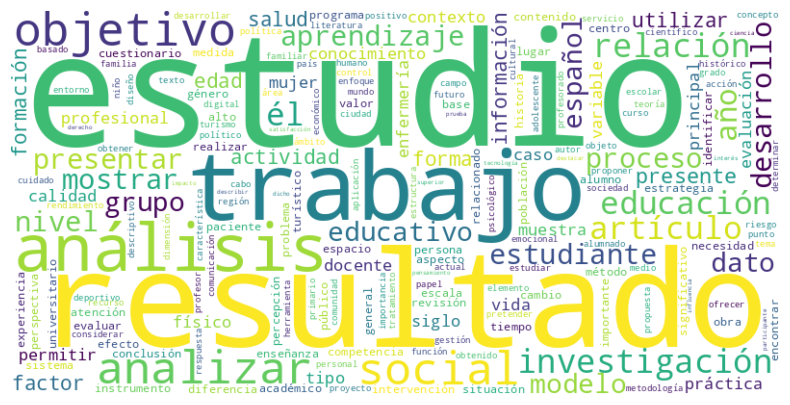


Resumen del análisis del corpus:
--------------------------------
Total de términos procesados: 23520
Total de palabras únicas: 32602
Palabra más frecuente: "estudio" (frecuencia: 11781)
Top 200 palabras más frecuentes:
estudio           11781
resultado          8202
trabajo            7468
análisis           6712
objetivo           6027
social             5881
analizar           5846
investigación      5476
relación           5388
educación          5042
él                 5033
artículo           4957
año                4426
proceso            3961
presentar          3949
mostrar            3893
aprendizaje        3850
nivel              3791
estudiante         3749
desarrollo         3696
dato               3539
español            3521
modelo             3496
educativo          3496
grupo              3449
presente           3419
actividad          3220
utilizar           3106
formación          3072
factor             3015
salud              3007
forma              2920
información

In [ ]:
## 2b.3 CÁCULO DE LA FRECUENCIA DE LOS TÉRMINOS EN EL CORPUS.

# Cálculo inicial de palabras más frecuentes de todo el corpus y su frecuencia.


import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime

# Definir rutas de archivos
INPUT_CSV = os.path.join(TABLAS, 'corpus_es.csv')
OUTPUT_WORDCLOUD = os.path.join(GRAFICOS, 'wordcloud_corpus_es.png')
# OUTPUT_TFIDF_CSV = os.path.join(TABLAS, 'tfidf_corpus_es.csv')
SUMMARY_TXT = os.path.join(LOGS, 'tf_idf_corpus_es.txt')

# Iniciar el tiempo de ejecución
start_time = datetime.now()


#"""

# Leer el archivo CSV de entrada
try:
    df = pd.read_csv(INPUT_CSV)
except FileNotFoundError:
    print(f"Error: El archivo {INPUT_CSV} no existe.")
    exit()

# Filtrar filas con contenido no nulo
# df_contenido = df[df['Corpus'].notna() & (df['Corpus'] != '')]
df_contenido = df[df['Corpus'].notna() & (df['Corpus'] != '')].copy()

#"""


# Crear el contador
vectorizer = CountVectorizer()

# Entrenar, aplicar y almacenar el recuento de palabras
words_per_comment = vectorizer.fit_transform(df_contenido['Corpus'])
words_per_comment = pd.DataFrame(words_per_comment.toarray(), columns=vectorizer.get_feature_names_out())

# Sumar la frecuencia de cada palabra en todo el corpus
word_counts = words_per_comment.sum()

# Ordenar las palabras por frecuencia
word_counts = word_counts.sort_values(ascending=False)

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Guardar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(OUTPUT_WORDCLOUD)
plt.show()
plt.close()

# Calcular los TF-IDF
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=30000)
tf_idf = vectorizer_tfidf.fit_transform(df_contenido["Corpus"])

df_tfidf = pd.DataFrame(tf_idf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Guardar el DataFrame TF-IDF
# df_tfidf.to_csv(OUTPUT_TFIDF_CSV, index=False)

# ----------------
# EN VEZ DE GUARDAR EL DataFrame TF-IDF, TRABAJAMOS CON EL EN MEMORIA
# PUEDE SUPONER VARIOS GIGAS
# ----------------

# Calcular el tiempo total de ejecución
end_time = datetime.now()
duration = end_time - start_time

# Generar resumen de resultados
resumen = f"""
Resumen del análisis del corpus:
--------------------------------
Total de términos procesados: {len(df_contenido)}
Total de palabras únicas: {len(word_counts)}
Palabra más frecuente: "{word_counts.index[0]}" (frecuencia: {word_counts.iloc[0]})
Top 200 palabras más frecuentes:
{word_counts[:200].to_string()}

Total de características TF-IDF: {df_tfidf.shape[1]}
Tiempo total de ejecución: {duration}

La nube de palabras se ha guardado en:
'{OUTPUT_WORDCLOUD}'


"""

print(resumen)

# Guardar resumen en un archivo TXT
with open(SUMMARY_TXT, 'w', encoding='utf-8') as summary_file:
    summary_file.write(resumen)

print(f"Resumen guardado en '{SUMMARY_TXT}'")


### 2b.4 CREACIÓN DE CLUSTER CON SIMILARIDAD DEL COSENO

**Objetivo del script: Clasificación temática automática**

Este script asigna automáticamente categorías temáticas a los artículos académicos basándose en su similitud con el Tesauro UNESCO, utilizando técnicas de procesamiento de lenguaje natural.

---

**Objetivo**  
Clasificar los artículos en categorías específicas mediante:
1. **Modelado TF-IDF** para representación numérica de textos.
2. **Similitud del coseno** para comparación con categorías UNESCO.
3. **Umbral de decisión** para filtrar coincidencias relevantes.

---

**Flujo principal**  
1. **Entradas**:  
   - `corpus_es.csv`: Textos procesados de los artículos.  
   - `tesauro_unesco_corpus.csv`: Categorías y términos del Tesauro UNESCO.  

2. **Procesamiento**:  
   - Calcula pesos TF-IDF para corpus y tesauro.  
   - Mide similitud entre cada artículo y las categorías UNESCO.  
   - Asigna hasta 2 categorías por artículo (umbral: 0.05 de similitud).  

3. **Salidas**:  
   - `clusters.csv`: Artículos etiquetados con categorías UNESCO.  
   - `creacion_tabla_clusters.txt`: Reporte estadístico del proceso.  

---

**Ejemplo de salida (`clusters.csv`)**

| ns_identifier | Corpus            | Categoria1          | cluster | Categoria2          |
|---------------|-------------------|---------------------|---------|---------------------|
| art123        | educacion superior| Enseñanza superior  | 06.01   | Política educativa  |



In [ ]:
## 2b.4 CREACIÓN DE CLUSTER CON SIMILARIDAD DEL COSENO

# CREACIÓN DE CLUSTER CON SIMILARIDAD DEL COSENO

import os
import time
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# Definición de rutas de entrada y salida

CORPUS_INPUT = os.path.join(TABLAS, 'corpus_es.csv')
THESAURUS_INPUT = os.path.join(TESAUROS, 'tesauro_unesco_corpus.csv')
CORPUS_OUTPUT = os.path.join(TABLAS, 'clusters.csv')
LOGS_OUTPUT = os.path.join(LOGS, 'creacion_tabla_clusters.txt')

# Definición del umbral de similitud
UMBRAL_SIMILITUD = 0.05

def cargar_datos():
    """Carga los datos del corpus y del tesauro."""
    corpus_df = pd.read_csv(CORPUS_INPUT)
    thesaurus_df = pd.read_csv(THESAURUS_INPUT)
    return corpus_df, thesaurus_df

def calcular_tf_idf(corpus, thesaurus):
    """Calcula los vectores TF-IDF para el corpus y el tesauro."""
    vectorizer = TfidfVectorizer()
    corpus_tfidf = vectorizer.fit_transform(corpus.fillna(''))
    thesaurus_tfidf = vectorizer.transform(thesaurus.fillna(''))
    return corpus_tfidf, thesaurus_tfidf

def calcular_similitud(corpus_tfidf, thesaurus_tfidf):
    """Calcula la similitud del coseno entre el corpus y el tesauro."""
    return cosine_similarity(corpus_tfidf, thesaurus_tfidf)

def asignar_categorias(matriz_similitud, thesaurus_df, top_n=2):
    """
    Asigna categorías a los artículos basándose en la similitud y el umbral.
    Incluye la categoría 'Sin clasificación' si no se supera el umbral.
    """
    categorias = []
    for fila in matriz_similitud:
        if np.max(fila) < UMBRAL_SIMILITUD:
            categorias.append([('Sin clasificación', '0')] * top_n)
        else:
            indices_top = fila.argsort()[-top_n:][::-1]
            cat = [
                (thesaurus_df.iloc[i]['MicroTesauro'], thesaurus_df.iloc[i]['MicroTesauro_ID'])
                for i in indices_top if fila[i] >= UMBRAL_SIMILITUD
            ]
            while len(cat) < top_n:
                cat.append(('Sin clasificación', '0'))
            categorias.append(cat)
    return categorias

def main():
    tiempo_inicio = time.time()

    print("Cargando datos...")
    corpus_df, thesaurus_df = cargar_datos()

    print("Calculando TF-IDF...")
    corpus_tfidf, thesaurus_tfidf = calcular_tf_idf(corpus_df['Corpus'], thesaurus_df['Términos'])

    print("Calculando similitud...")
    matriz_similitud = calcular_similitud(corpus_tfidf, thesaurus_tfidf)

    print("Asignando categorías...")
    categorias = asignar_categorias(matriz_similitud, thesaurus_df)

    # Asignación de categorías al DataFrame del corpus
    corpus_df['Categoria1'] = [cat[0][0] for cat in categorias]


    # corpus_df['Categoria1_ID'] = [cat[0][1] for cat in categorias]
    # RENOMBRAMOS ESTA COLUMNA PARA AJUSTARLA AL PROYECTO
    corpus_df['cluster'] = [cat[0][1] for cat in categorias]


    corpus_df['Categoria2'] = [cat[1][0] if len(cat) > 1 else 'Sin clasificación' for cat in categorias]
    corpus_df['Categoria2_ID'] = [cat[1][1] if len(cat) > 1 else '0' for cat in categorias]

    print("Guardando corpus categorizado...")
    corpus_df.to_csv(CORPUS_OUTPUT, index=False)

    # Generación del resumen
    distribucion_categorias = Counter(corpus_df['Categoria1'])
    total_articulos = len(corpus_df)
    tiempo_ejecucion = time.time() - tiempo_inicio

    resumen = f"""
Resumen de Categorización TF-IDF
--------------------------------
Tiempo de ejecución: {tiempo_ejecucion:.2f} segundos
Total de artículos procesados: {total_articulos}
Umbral de similitud utilizado: {UMBRAL_SIMILITUD}

Distribución de Categorías (Top 10):
{'-' * 40}
"""
    for categoria, conteo in distribucion_categorias.most_common(10):
        porcentaje = (conteo / total_articulos) * 100
        resumen += f"{categoria}: {conteo} ({porcentaje:.2f}%)\n"

    resumen += f"""
{'-' * 40}
Puntuación de similitud promedio: {np.mean(matriz_similitud):.4f}
Puntuación de similitud máxima: {np.max(matriz_similitud):.4f}
Puntuación de similitud mínima: {np.min(matriz_similitud):.4f}

Artículos sin clasificación: {sum(corpus_df['Categoria1'] == 'Sin clasificación')}/{total_articulos} ({(sum(corpus_df['Categoria1'] == 'Sin clasificación') / total_articulos) * 100:.2f}%)
Artículos con múltiples categorías: {sum(corpus_df['Categoria2'] != 'Sin clasificación')}/{total_articulos} ({(sum(corpus_df['Categoria2'] != 'Sin clasificación') / total_articulos) * 100:.2f}%)

Archivos de salida:
- Corpus categorizado: {CORPUS_OUTPUT}
- Este resumen: {LOGS_OUTPUT}
"""

    print(resumen)

    with open(LOGS_OUTPUT, 'w', encoding='utf-8') as f:
        f.write(resumen)

    print(f"Resumen guardado en {LOGS_OUTPUT}")
    print("Cálculo TF-IDF y categorización completados!")

# Ejecutar la función principal
main()


Cargando datos...
Calculando TF-IDF...
Calculando similitud...
Asignando categorías...
Guardando corpus categorizado...

Resumen de Categorización TF-IDF
--------------------------------
Tiempo de ejecución: 38.77 segundos
Total de artículos procesados: 24650
Umbral de similitud utilizado: 0.05

Distribución de Categorías (Top 10):
----------------------------------------
Sin clasificación: 5665 (22.98%)
Literatura: 747 (3.03%)
Historia: 705 (2.86%)
Sistemas sociales: 663 (2.69%)
Sistemas y niveles de enseñanza: 551 (2.24%)
Profesionales de la educación: 498 (2.02%)
Gestión de personal: 494 (2.00%)
Política y gobierno: 469 (1.90%)
Enfoque científico: 453 (1.84%)
Enseñanza y formación: 403 (1.63%)

----------------------------------------
Puntuación de similitud promedio: 0.0119
Puntuación de similitud máxima: 0.9065
Puntuación de similitud mínima: 0.0000

Artículos sin clasificación: 5665/24650 (22.98%)
Artículos con múltiples categorías: 15680/24650 (63.61%)

Archivos de salida:
- Cor

# 3. CREACION DEL FICHERO RDF

In [ ]:
!pip install rdflib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 8.2 MB/s eta 0:00:00


## 3.1 GENERACIÓN DE GRUPOTEMA



**Objetivo del script: Generación de RDF para Grupos Temáticos**

Este script transforma las categorías del Tesauro UNESCO en un grafo RDF estructurado, permitiendo su integración en sistemas de datos vinculados.

**Flujo principal**  
1. **Entrada**:  
   - `tesauro_unesco_corpus.csv`: Categorías y metadatos del tesauro.

2. **Procesamiento**:  
   - Crea URIs únicas para cada grupo temático (ej: `tema_06.01`).  
   - Añade propiedades semánticas:  
     - `dcterms:title`: Nombre de la categoría.  
     - `owl:sameAs`: Enlace al URI oficial del tesauro.  
     - `ontorevistas:grupoTemaArea`: Área principal asociada.  

3. **Salidas**:  
   - `grupos_tematicos.ttl`: Archivo RDF en formato Turtle.  
   - `rdf_grupos_tematicos.txt`: Reporte con métricas de ejecución.  

---


In [ ]:
## 3.1 GENERACIÓN DE GRUPOTEMA


import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import SKOS, DCTERMS, FOAF, RDF, RDFS, XSD, OWL
from tqdm import tqdm
import time

# --------------------------------------------------
# 1. CONFIGURACIÓN INICIAL
# --------------------------------------------------

# a. Definir Rutas de Archivos

TESAUROS = PIPELINE + "TESAUROS/"
LOGS = PIPELINE + "LOGS/"
RDFOUT = PIPELINE + "RDFOUT/"  # Directorio de salida para RDF

# b. Definir Espacios de Nombres (prefijos)
ontorevistas = Namespace("http://gicd.inf.um.es/wd/ontorevistas/")
schema = Namespace("http://schema.org/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
xsd = Namespace("http://www3.org/2001/XMLSchema#")
skos = Namespace("http://www.w3.org/2004/02/skos/core#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
foaf = Namespace("http://xmlns.com/foaf/0.1/")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
datarevistas = Namespace("http://gicd.inf.um.es/wd/datarevistas/")
dcterms = Namespace("http://purl.org/dc/terms/")
bibo = Namespace("http://purl.org/ontology/bibo/")

# c. Crear un grafo RDF
g = Graph()

# d. Enlazar los espacios de nombres al grafo (para usar los prefijos)
g.bind("ontorevistas", ontorevistas)
g.bind("schema", schema)
g.bind("owl", owl)
g.bind("xsd", xsd)
g.bind("skos", skos)
g.bind("rdfs", rdfs)
g.bind("foaf", foaf)
g.bind("rdf", rdf)
g.bind("datarevistas", datarevistas)
g.bind("dcterms", dcterms)
g.bind("bibo", bibo)

# --------------------------------------------------
# 2. CARGAR DATOS CSV
# --------------------------------------------------

# a. Cargar las tablas CSV usando pandas
try:
    temas_df = pd.read_csv(TESAUROS + "tesauro_unesco_corpus.csv", on_bad_lines='skip', engine='python')
except FileNotFoundError:
    print(f"Error: No se encontró el archivo 'tesauro_unesco_corpus.csv' en la ruta: {TESAUROS}")
    exit()  # Salir del script si no se encuentra el archivo

# --------------------------------------------------
# 3. GENERAR INSTANCIAS DE GRUPOTEMA
# --------------------------------------------------

def generar_grupos_tematicos():
    print("Generando instancias de GrupoTema...")
    for index, row in tqdm(temas_df.iterrows(), total=len(temas_df), desc="Grupos Temáticos"):
        # Crear URI para el grupo temático
        cluster_id = str(row['MicroTesauro_ID']).replace(" ", "")  # Eliminar espacios del ID y convertir a string
        grupo_tema_uri = URIRef(datarevistas[f"tema_{cluster_id}"])

        # Añadir tipos y propiedades
        g.add((grupo_tema_uri, RDF.type, ontorevistas.GrupoTema))
        g.add((grupo_tema_uri, ontorevistas.grupoTemaID, Literal(cluster_id, datatype=XSD.string)))
        g.add((grupo_tema_uri, DCTERMS.title, Literal(row['MicroTesauro'], datatype=XSD.string)))
        g.add((grupo_tema_uri, ontorevistas.grupoTemaArea, Literal(row['Grupo'], datatype=XSD.string)))
        g.add((grupo_tema_uri, RDFS.label, Literal(row['MicroTesauro'], datatype=XSD.string)))
        g.add((grupo_tema_uri, OWL.sameAs, URIRef(row['MicroTesauro_URI'])))

    # Añadir el tema especial "No clasificado" después de procesar todos los registros
    tema_no_clasificado = URIRef(datarevistas["tema_0.0"])

    g.add((tema_no_clasificado, RDF.type, ontorevistas.GrupoTema))
    g.add((tema_no_clasificado, RDFS.label, Literal("No clasificado", datatype=XSD.string)))
    g.add((tema_no_clasificado, ontorevistas.grupoTemaArea, Literal("No clasificado", datatype=XSD.string)))
    g.add((tema_no_clasificado, ontorevistas.grupoTemaID, Literal("0.0", datatype=XSD.string)))
    g.add((tema_no_clasificado, DCTERMS.title, Literal("No clasificado", datatype=XSD.string)))

# --------------------------------------------------
# 4. GUARDAR EL GRAFO RDF
# --------------------------------------------------

# a. Iniciar el contador de tiempo
start_time = time.time()
generar_grupos_tematicos()

# b. Calcular el tiempo de ejecución
end_time = time.time()
elapsed_time = end_time - start_time

# Serializar el grafo a Turtle
rdf_output_path = RDFOUT + "grupos_tematicos.ttl"  # Archivo de salida específico
g.serialize(destination=rdf_output_path, format="turtle")

# --------------------------------------------------
# 5. GENERAR REPORTE DE RESULTADOS
# --------------------------------------------------

# Contar tripletas, clases, etc.
num_triples = len(g)
classes = set()
for s, p, o in g:
    if p == RDF.type:
        classes.add(o)

num_classes = len(classes)

# c. Crear reporte
report = f"""
Reporte de Generación de RDF para Grupos Temáticos:
------------------------------
Tiempo de ejecución: {elapsed_time:.2f} segundos
Número de tripletas generadas: {num_triples}
Número de clases utilizadas: {num_classes}
Archivo RDF generado: {rdf_output_path}
"""

print(report)

# d. Guardar el reporte en un archivo de texto
report_path = LOGS + "rdf_grupos_tematicos.txt"
with open(report_path, "w") as f:
    f.write(report)

print("¡Proceso completado para Grupos Temáticos!")


Generando instancias de GrupoTema...


Grupos Temáticos: 100%|██████████| 88/88 [00:00<00:00, 2112.60it/s]



Reporte de Generación de RDF para Grupos Temáticos:
------------------------------
Tiempo de ejecución: 0.05 segundos
Número de tripletas generadas: 533
Número de clases utilizadas: 1
Archivo RDF generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT/grupos_tematicos.ttl

¡Proceso completado para Grupos Temáticos!


## 3.2 GENERACIÓN DE REVISTA

**Objetivos del script: Generación de RDF para Revistas**

Este script transforma las tablas csv creadas anteriormente en un grafo RDF estructurado.

---
**Flujo principal**  
1. **Entrada**:  
   - `revistas.csv`: Tabla con metadatos básicos de revistas (ID, nombre, URL, ISSN, DOI, etc.).

2. **Procesamiento**:  
   - Genera URIs únicas para cada revista (ej: `revista_123`).  
   - Añade propiedades semánticas:  
     - `dcterms:identifier`: ID único de la revista.  
     - `rdfs:label`: Nombre oficial.  
     - `ontorevistas:revistaURL`: Enlace al sitio web.  
     - `ontorevistas:revistaImagen`: URL de la imagen/logo.  

3. **Salidas**:  
   - `revistas.ttl`: Archivo RDF en formato Turtle.  
   - `rdf_revistas.txt`: Reporte con métricas de ejecución.  

---



In [ ]:
## 3.2 GENERACIÓN DE REVISTA

import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import SKOS, DCTERMS, FOAF, RDF, RDFS, XSD
from tqdm import tqdm
import time
import logging

# --------------------------------------------------
# 1. CONFIGURACIÓN INICIAL
# --------------------------------------------------

# a. Definir Rutas de Archivos

TABLAS = PIPELINE + "TABLAS/"
LOGS = PIPELINE + "LOGS/"
RDFOUT = PIPELINE + "RDFOUT/"  # Directorio de salida para RDF

# b. Definir Espacios de Nombres (prefijos)
ontorevistas = Namespace("http://gicd.inf.um.es/wd/ontorevistas/")
schema = Namespace("http://schema.org/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
xsd = Namespace("http://www.w3.org/2001/XMLSchema#")
skos = Namespace("http://www.w3.org/2004/02/skos/core#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
foaf = Namespace("http://xmlns.com/foaf/0.1/")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
datarevistas = Namespace("http://gicd.inf.um.es/wd/datarevistas/")
dcterms = Namespace("http://purl.org/dc/terms/")
bibo = Namespace("http://purl.org/ontology/bibo/")

# c. Crear un grafo RDF
g = Graph()

# d. Enlazar los espacios de nombres al grafo (para usar los prefijos)
g.bind("ontorevistas", ontorevistas)
g.bind("schema", schema)
g.bind("owl", owl)
g.bind("xsd", xsd)
g.bind("skos", skos)
g.bind("rdfs", rdfs)
g.bind("foaf", foaf)
g.bind("rdf", RDF)
g.bind("datarevistas", datarevistas)
g.bind("dcterms", dcterms)
g.bind("bibo", bibo)

# --------------------------------------------------
# 2. CARGAR DATOS CSV
# --------------------------------------------------

# a. Cargar las tablas CSV usando pandas
try:
    revistas_df = pd.read_csv(TABLAS + "revistas.csv")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo 'revistas.csv' en la ruta: {TABLAS}")
    exit()  # Salir del script si no se encuentra el archivo

# --------------------------------------------------
# 3. GENERAR INSTANCIAS DE REVISTA
# --------------------------------------------------

def generar_revistas():
    print("Generando instancias de Revista...")
    for index, row in tqdm(revistas_df.iterrows(), total=len(revistas_df), desc="Revistas"):
        # Crear URI para la revista
        revista_id = row['Revista_ID'].replace(" ", "")
        revista_uri = URIRef(datarevistas[f"revista_{revista_id}"])

        # Añadir tipos y propiedades
        g.add((revista_uri, RDF.type, ontorevistas.Revista))
        g.add((revista_uri, DCTERMS.identifier, Literal(revista_id, datatype=XSD.string)))
        g.add((revista_uri, RDFS.label, Literal(row['Nombre'], datatype=XSD.string)))
        g.add((revista_uri, ontorevistas.revistaURL, URIRef(row['URL'])))
        g.add((revista_uri, ontorevistas.revistaImagen, URIRef(row['Imagen']))) #Añadimos la imagen

        # Properties
        if pd.notna(row['DOI']):
            g.add((revista_uri, ontorevistas.revistaDOI, URIRef(row['DOI'])))
        if pd.notna(row['ISSN-E']):
            g.add((revista_uri, ontorevistas.revistaISSNE, Literal(row['ISSN-E'], datatype=XSD.string)))
        if pd.notna(row['ISSN-Impreso']):
            g.add((revista_uri, ontorevistas.revistaISSN, Literal(row['ISSN-Impreso'], datatype=XSD.string)))

# --------------------------------------------------
# 4. GUARDAR EL GRAFO RDF
# --------------------------------------------------

# a. Iniciar el contador de tiempo
start_time = time.time()
generar_revistas()

# b. Calcular el tiempo de ejecución
end_time = time.time()
elapsed_time = end_time - start_time

# Serializar el grafo a Turtle
rdf_output_path = RDFOUT + "revistas.ttl"  # Archivo de salida específico
g.serialize(destination=rdf_output_path, format="turtle")


# --------------------------------------------------
# 5. GENERAR REPORTE DE RESULTADOS
# --------------------------------------------------

# Contar tripletas, clases, etc.
num_triples = len(g)
classes = set()
for s, p, o in g:
    if p == RDF.type:
        classes.add(o)

num_classes = len(classes)

# c. Crear reporte
report = f"""
Reporte de Generación de RDF para Revistas:
------------------------------
Tiempo de ejecución: {elapsed_time:.2f} segundos
Número de tripletas generadas: {num_triples}
Número de clases utilizadas: {num_classes}
Archivo RDF generado: {rdf_output_path}
"""

print(report)

# d. Guardar el reporte en un archivo de texto
report_path = LOGS + "rdf_revistas.txt"
with open(report_path, "w") as f:
    f.write(report)

print("¡Proceso completado para Revistas!")


Generando instancias de Revista...


Revistas: 100%|██████████| 43/43 [00:00<00:00, 276.73it/s]



Reporte de Generación de RDF para Revistas:
------------------------------
Tiempo de ejecución: 0.18 segundos
Número de tripletas generadas: 321
Número de clases utilizadas: 1
Archivo RDF generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT/revistas.ttl

¡Proceso completado para Revistas!


## 3.3 GENERACION DE NUMEROS

**Objetivos del script: Generación de RDF para Números/Volúmenes**

Este script transforma los metadatos de ediciones de revistas académicas en un grafo RDF estructurado.

---

**Flujo principal**  
1. **Entradas**:  
   - `numeros.csv`: Tabla con volúmenes y conteo de artículos.  
   - `articulos_volumenes.csv`: Relación artículo-volumen.  

2. **Procesamiento**:  
   - Genera URIs únicas para cada número (ej: `numero_revistaX_0001`).  
   - Añade propiedades semánticas:  
     - `ontorevistas:numeroVolumen`: Nombre del volumen/edición.  
     - `ontorevistas:esParteDeRevista`: Vinculación con la revista madre.  
     - `ontorevistas:tieneArticulo`: Listado de artículos contenidos.  

3. **Salidas**:  
   - `numeros.ttl`: Archivo RDF en formato Turtle.  
   - `rdf_numeros.txt`: Reporte con métricas de ejecución.  

---



In [ ]:
## 3.3 GENERACION DE NUMEROS

# VERSION MODIFICADA CON MENOS PROPIEDADES

import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import SKOS, DCTERMS, FOAF, RDF, RDFS, XSD
from tqdm import tqdm
import time
import re

# --------------------------------------------------
# 1. CONFIGURACIÓN INICIAL
# --------------------------------------------------

# a. Definir Rutas de Archivos

TABLAS = PIPELINE + "TABLAS/"
LOGS = PIPELINE + "LOGS/"
RDFOUT = PIPELINE + "RDFOUT/"  # Directorio de salida para RDF

# b. Definir Espacios de Nombres (prefijos)
ontorevistas = Namespace("http://gicd.inf.um.es/wd/ontorevistas/")
schema = Namespace("http://schema.org/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
xsd = Namespace("http://www.w3.org/2001/XMLSchema#")
skos = Namespace("http://www.w3.org/2004/02/skos/core#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
foaf = Namespace("http://xmlns.com/foaf/0.1/")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
datarevistas = Namespace("http://gicd.inf.um.es/wd/datarevistas/")
dcterms = Namespace("http://purl.org/dc/terms/")
bibo = Namespace("http://purl.org/ontology/bibo/")

# c. Crear un grafo RDF
g = Graph()

# d. Enlazar los espacios de nombres al grafo (para usar los prefijos)
g.bind("ontorevistas", ontorevistas)
g.bind("schema", schema)
g.bind("owl", owl)
g.bind("xsd", xsd)
g.bind("skos", skos)
g.bind("rdfs", rdfs)
g.bind("foaf", foaf)
g.bind("rdf", rdf)
g.bind("datarevistas", datarevistas)
g.bind("dcterms", dcterms)
g.bind("bibo", bibo)

# --------------------------------------------------
# 2. CARGAR DATOS CSV
# --------------------------------------------------

# a. Cargar las tablas CSV usando pandas
try:
    numeros_df = pd.read_csv(TABLAS + "numeros.csv")
    articulos_volumenes_df = pd.read_csv(TABLAS + "articulos_volumenes.csv")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo 'numeros.csv' en la ruta: {TABLAS}")
    exit()  # Salir del script si no se encuentra el archivo

# --------------------------------------------------
# 3. GENERAR INSTANCIAS DE NUMERO
# --------------------------------------------------

def generar_numeros():
    print("Generando instancias de Numero...")
    numero_id_counter = 1  # Inicializar el contador de ID

    for index, row in tqdm(numeros_df.iterrows(), total=len(numeros_df), desc="Números"):
        # Obtener datos de la fila
        revista_id = row['Revista_ID'].replace(" ", "")
        #CAMBIO DE volumen a nombre_volumen
        volumen = row['nombre_volumen']
        #CAMBIO DE revista_volumen a nombre_volumen
        nombre_volumen = row['nombre_volumen']

        # Crear URI para el número
        numero_id = f"{numero_id_counter:04d}"  # ID numérico con formato
        numero_uri = URIRef(datarevistas[f"numero_{revista_id}_{numero_id}"])

        #Añadir el tipo al principio
        g.add((numero_uri, RDF.type, ontorevistas.Numero))

        # Obtener la URI de la revista a la que pertenece el número
        revista_uri = URIRef(datarevistas[f"revista_{revista_id}"])

        # Añadir propiedades
        g.add((numero_uri, ontorevistas.numeroVolumen, Literal(volumen, datatype=XSD.string)))
        g.add((numero_uri, ontorevistas.esParteDeRevista, revista_uri))
        g.add((numero_uri, RDFS.label, Literal(f"{nombre_volumen}", datatype=XSD.string)))

        # if pd.notna(row['volumen_url']):
            # g.add((numero_uri, ontorevistas.numeroURL, URIRef(row['volumen_url'])))

        # Añadir la imagen del número
        # if pd.notna(row['imagen_numero']):
            # g.add((numero_uri, ontorevistas.numeroImagen, URIRef(row['imagen_numero'])))


        # Añadir artículos al número
        articulos_numero = articulos_volumenes_df[articulos_volumenes_df['nombre_volumen'] == nombre_volumen]
        for _, articulo_row in articulos_numero.iterrows():
            ns0_identifier = articulo_row['ns0_identifier']
            articulo_id = re.search(r'article/(\d+)', ns0_identifier).group(1)
            articulo_uri = URIRef(datarevistas[f"articulo_{articulo_id}"])
            g.add((numero_uri, ontorevistas.tieneArticulo, articulo_uri))


        numero_id_counter += 1  # Incrementar el contador para el siguiente número

# --------------------------------------------------
# 4. GUARDAR EL GRAFO RDF
# --------------------------------------------------

# a. Iniciar el contador de tiempo
start_time = time.time()
generar_numeros()

# b. Calcular el tiempo de ejecución
end_time = time.time()
elapsed_time = end_time - start_time

# Serializar el grafo a Turtle
rdf_output_path = RDFOUT + "numeros.ttl"  # Archivo de salida específico
g.serialize(destination=rdf_output_path, format="turtle")

# --------------------------------------------------
# 5. GENERAR REPORTE DE RESULTADOS
# --------------------------------------------------

# Contar tripletas, clases, etc.
num_triples = len(g)
classes = set()
for s, p, o in g:
    if p == RDF.type:
        classes.add(o)

num_classes = len(classes)

# c. Crear reporte
report = f"""
Reporte de Generación de RDF para Números:
------------------------------
Tiempo de ejecución: {elapsed_time:.2f} segundos
Número de tripletas generadas: {num_triples}
Número de clases utilizadas: {num_classes}
Archivo RDF generado: {rdf_output_path}
"""

print(report)

# d. Guardar el reporte en un archivo de texto
report_path = LOGS + "rdf_numeros.txt"
with open(report_path, "w") as f:
    f.write(report)

print("¡Proceso completado para Números!")


Generando instancias de Numero...


Números: 100%|██████████| 1596/1596 [00:22<00:00, 71.39it/s]



Reporte de Generación de RDF para Números:
------------------------------
Tiempo de ejecución: 22.37 segundos
Número de tripletas generadas: 31034
Número de clases utilizadas: 1
Archivo RDF generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT/numeros.ttl

¡Proceso completado para Números!


## 3.4 GENERACION DE AUTOR

**Objetivos del script: Generación de RDF para Autores**

Este script transforma los datos de autores normalizados en un grafo RDF estructurado.

---

**Flujo principal**  
1. **Entrada**:  
   - `autores_normalizados.csv`: Tabla con autores únicos y sus artículos asociados.

2. **Procesamiento**:  
   - Genera URIs únicas para cada autor (ej: `autor_AU-UM-01000001`).  
   - Añade propiedades semánticas:  
     - `ontorevistas:autorID`: ID único generado automáticamente.  
     - `rdfs:label`: Nombre normalizado del autor.  
     - `ontorevistas:esAutorDe`: Vinculación con artículos publicados.  

3. **Salidas**:  
   - `autores.ttl`: Archivo RDF en formato Turtle.  
   - `rdf_autores.txt`: Reporte con métricas de ejecución.  

---



In [ ]:
## 3.4 GENERACION DE AUTOR

import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import SKOS, DCTERMS, FOAF, RDF, RDFS, XSD
from tqdm import tqdm
import time
import logging
import re

# --------------------------------------------------
# 1. CONFIGURACIÓN INICIAL
# --------------------------------------------------

# a. Definir Rutas de Archivos

TABLAS = PIPELINE + "TABLAS/"
LOGS = PIPELINE + "LOGS/"
RDFOUT = PIPELINE + "RDFOUT/"  # Directorio de salida para RDF

# b. Definir Espacios de Nombres (prefijos)
ontorevistas = Namespace("http://gicd.inf.um.es/wd/ontorevistas/")
schema = Namespace("http://schema.org/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
xsd = Namespace("http://www.w3.org/2001/XMLSchema#")
skos = Namespace("http://www.w3.org/2004/02/skos/core#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
foaf = Namespace("http://xmlns.com/foaf/0.1/")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
datarevistas = Namespace("http://gicd.inf.um.es/wd/datarevistas/")
dcterms = Namespace("http://purl.org/dc/terms/")
bibo = Namespace("http://purl.org/ontology/bibo/")

# c. Crear un grafo RDF
g = Graph()

# d. Enlazar los espacios de nombres al grafo (para usar los prefijos)
g.bind("ontorevistas", ontorevistas)
g.bind("schema", schema)
g.bind("owl", owl)
g.bind("xsd", xsd)
g.bind("skos", skos)
g.bind("rdfs", rdfs)
g.bind("foaf", foaf)
g.bind("rdf", rdf)
g.bind("datarevistas", datarevistas)
g.bind("dcterms", dcterms)
g.bind("bibo", bibo)

# --------------------------------------------------
# 2. CARGAR DATOS CSV
# --------------------------------------------------

# a. Cargar las tablas CSV usando pandas
try:
    autores_df = pd.read_csv(TABLAS + "autores_normalizados.csv")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo 'autores_normalizados.csv' en la ruta: {TABLAS}")
    exit()  # Salir del script si no se encuentra el archivo

# --------------------------------------------------
# 3. GENERAR INSTANCIAS DE AUTOR
# --------------------------------------------------

def generar_autores():
    print("Generando instancias de Autor...")
    for index, row in tqdm(autores_df.iterrows(), total=len(autores_df), desc="Autores"):
        # Crear URI para el autor
        autor_id = f"AU-UM-01{index+1:06d}"
        autor_uri = URIRef(datarevistas[f"autor_{autor_id}"])

        # Añadir tipos y propiedades
        g.add((autor_uri, RDF.type, ontorevistas.Autor))
        g.add((autor_uri, ontorevistas.autorID, Literal(autor_id, datatype=XSD.string)))
        g.add((autor_uri, RDFS.label, Literal(row['author'], datatype=XSD.string)))

        # Añadir relación con artículos
        if pd.notna(row['ns0_identifiers']):
            articulos = row['ns0_identifiers'].split(" | ")
            for articulo in articulos:
                articulo_id = re.search(r'article/(\d+)', articulo)
                if articulo_id:
                    articulo_uri = URIRef(datarevistas[f"articulo_{articulo_id.group(1)}"])
                    g.add((autor_uri, ontorevistas.esAutorDe, articulo_uri))

# --------------------------------------------------
# 4. GUARDAR EL GRAFO RDF
# --------------------------------------------------

# a. Iniciar el contador de tiempo
start_time = time.time()
generar_autores()

# b. Calcular el tiempo de ejecución
end_time = time.time()
elapsed_time = end_time - start_time

# Serializar el grafo a Turtle
rdf_output_path = RDFOUT + "autores.ttl"  # Archivo de salida específico
g.serialize(destination=rdf_output_path, format="turtle")

# --------------------------------------------------
# 5. GENERAR REPORTE DE RESULTADOS
# --------------------------------------------------

# Contar tripletas, clases, etc.
num_triples = len(g)
classes = set()
for s, p, o in g:
    if p == RDF.type:
        classes.add(o)

num_classes = len(classes)

# c. Crear reporte
report = f"""
Reporte de Generación de RDF para Autores:
------------------------------
Tiempo de ejecución: {elapsed_time:.2f} segundos
Número de tripletas generadas: {num_triples}
Número de clases utilizadas: {num_classes}
Archivo RDF generado: {rdf_output_path}
"""

print(report)

# d. Guardar el reporte en un archivo de texto
report_path = LOGS + "rdf_autores.txt"
with open(report_path, "w") as f:
    f.write(report)

print("¡Proceso completado para Autores!")


Generando instancias de Autor...


Autores: 100%|██████████| 33207/33207 [00:13<00:00, 2540.68it/s]



Reporte de Generación de RDF para Autores:
------------------------------
Tiempo de ejecución: 13.09 segundos
Número de tripletas generadas: 148588
Número de clases utilizadas: 1
Archivo RDF generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT/autores.ttl

¡Proceso completado para Autores!


## 3.5 GENERACION DE PALABRAS CLAVE

**Objetivos del script: Generación de RDF para Palabras Clave**

Este script transforma las palabras clave de artículos académicos en un grafo RDF enriquecido, vinculándolas con vocabularios controlados externos para mejorar su interoperabilidad semántica.

---
**Flujo principal**  
1. **Entradas**:  
   - `keywords_es.csv`: Palabras clave originales de artículos.  
   - `keywords_unesco.csv`: Vinculación con términos UNESCO.  
   - `keywords_lem.csv`: Vinculación con términos LEM.  

2. **Procesamiento**:  
   - Genera URIs únicas para cada palabra clave (ej: `palabraclave_KW-UM-01000001`).  
   - Añade propiedades semánticas:  
     - `ontorevistas:esPalabraClaveDe`: Relación con artículos.  
     - `ontorevistas:terminoUnesco`: Conexión con Tesauro UNESCO.  
     - `ontorevistas:terminoLEM`: Conexión con Tesauro LEM.  

3. **Salidas**:  
   - `palabras_clave.ttl`: Archivo RDF en formato Turtle.  
   - `rdf_palabras_clave.txt`: Reporte estadístico detallado.  

---


In [ ]:
## 3.5 GENERACION DE PALABRAS CLAVE


import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import SKOS, DCTERMS, FOAF, RDF, RDFS, XSD
from tqdm import tqdm
import time
import logging
import re

# --------------------------------------------------
# 1. CONFIGURACIÓN INICIAL
# --------------------------------------------------

# a. Definir Rutas de Archivos

TABLAS = PIPELINE + "TABLAS/"
LOGS = PIPELINE + "LOGS/"
RDFOUT = PIPELINE + "RDFOUT/"  # Directorio de salida para RDF

# b. Definir Espacios de Nombres (prefijos)
ontorevistas = Namespace("http://gicd.inf.um.es/wd/ontorevistas/")
schema = Namespace("http://schema.org/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
xsd = Namespace("http://www.w3.org/2001/XMLSchema#")
skos = Namespace("http://www.w3.org/2004/02/skos/core#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
foaf = Namespace("http://xmlns.com/foaf/0.1/")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
datarevistas = Namespace("http://gicd.inf.um.es/wd/datarevistas/")
dcterms = Namespace("http://purl.org/dc/terms/")
bibo = Namespace("http://purl.org/ontology/bibo/")

# c. Crear un grafo RDF
g = Graph()

# d. Enlazar los espacios de nombres al grafo (para usar los prefijos)
g.bind("ontorevistas", ontorevistas)
g.bind("schema", schema)
g.bind("owl", owl)
g.bind("xsd", xsd)
g.bind("skos", skos)
g.bind("rdfs", rdfs)
g.bind("foaf", foaf)
g.bind("rdf", rdf)
g.bind("datarevistas", datarevistas)
g.bind("dcterms", dcterms)
g.bind("bibo", bibo)

# --------------------------------------------------
# 2. CARGAR DATOS CSV
# --------------------------------------------------

# a. Cargar las tablas CSV usando pandas
try:
    keywords_df = pd.read_csv(TABLAS + "keywords_es.csv")
    keywords_unesco_df = pd.read_csv(TABLAS + "keywords_unesco.csv")
    keywords_lem_df = pd.read_csv(TABLAS + "keywords_lem.csv")
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo: {e.filename}")
    exit()

# --------------------------------------------------
# 3. GENERAR INSTANCIAS DE PALABRACLAVE
# --------------------------------------------------

def generar_palabras_clave():
    print("Generando instancias de PalabraClave...")
    instancias_generadas = 0
    enriquecidas_lem = 0
    enriquecidas_unesco = 0
    enriquecidas_ambas = 0
    keyword_counter = 1

    for index, row in tqdm(keywords_df.iterrows(), total=len(keywords_df), desc="Palabras Clave"):
        # Crear URI para la palabra clave
        keyword = row['keyword']
        keyword_id = f"KW-UM-01{keyword_counter:06d}"
        keyword_uri = URIRef(datarevistas[f"palabraclave_{keyword_id}"])

        # Añadir tipos y propiedades
        g.add((keyword_uri, RDF.type, ontorevistas.PalabraClave))
        g.add((keyword_uri, RDFS.label, Literal(keyword, datatype=XSD.string)))

        # Añadir relación con artículos
        if pd.notna(row['ns0_identifiers']):
            articulos = row['ns0_identifiers'].split(" | ")
            for articulo in articulos:
                articulo_id = re.search(r'article/(\d+)', articulo)
                if articulo_id:
                    articulo_uri = URIRef(datarevistas[f"articulo_{articulo_id.group(1)}"])
                    g.add((keyword_uri, ontorevistas.esPalabraClaveDe, articulo_uri))

        # Añadir términos UNESCO si existen
        unesco_terms = keywords_unesco_df[keywords_unesco_df['keyword'] == keyword]['unesco_URI'].tolist()
        for term in unesco_terms:
            g.add((keyword_uri, ontorevistas.terminoUnesco, URIRef(term)))

        # Añadir términos LEM si existen
        lem_terms = keywords_lem_df[keywords_lem_df['keyword'] == keyword]['lem_URI'].tolist()
        for term in lem_terms:
            g.add((keyword_uri, ontorevistas.terminoLEM, URIRef(term)))

        instancias_generadas += 1
        if unesco_terms:
            enriquecidas_unesco += 1
        if lem_terms:
            enriquecidas_lem += 1
        if unesco_terms and lem_terms:
            enriquecidas_ambas += 1

        keyword_counter += 1

    return instancias_generadas, enriquecidas_lem, enriquecidas_unesco, enriquecidas_ambas

# --------------------------------------------------
# 4. GUARDAR EL GRAFO RDF
# --------------------------------------------------

# a. Iniciar el contador de tiempo
start_time = time.time()
instancias_generadas, enriquecidas_lem, enriquecidas_unesco, enriquecidas_ambas = generar_palabras_clave()
end_time = time.time()
elapsed_time = end_time - start_time

# Serializar el grafo a Turtle
rdf_output_path = RDFOUT + "palabras_clave.ttl"
g.serialize(destination=rdf_output_path, format="turtle")

# --------------------------------------------------
# 5. GENERAR REPORTE DE RESULTADOS
# --------------------------------------------------

# Contar tripletas, clases, etc.
num_triples = len(g)
classes = set()
for s, p, o in g:
    if p == RDF.type:
        classes.add(o)

num_classes = len(classes)

# c. Crear reporte
report = f"""
Reporte de Generación de RDF para Palabras Clave:
------------------------------
Tiempo de ejecución: {elapsed_time:.2f} segundos
Número de tripletas generadas: {num_triples}
Número de clases utilizadas: {num_classes}
Archivo RDF generado: {rdf_output_path}

Resumen de instancias:
------------------------------
Total de instancias generadas: {instancias_generadas}
Instancias enriquecidas con LEM: {enriquecidas_lem}
Instancias enriquecidas con UNESCO: {enriquecidas_unesco}
Instancias enriquecidas con ambas: {enriquecidas_ambas}
"""

print(report)

# d. Guardar el reporte en un archivo de texto
report_path = LOGS + "rdf_palabras_clave.txt"
with open(report_path, "w") as f:
    f.write(report)

print("¡Proceso completado para Palabras Clave!")


Generando instancias de PalabraClave...


Palabras Clave: 100%|██████████| 39891/39891 [01:02<00:00, 640.66it/s]



Reporte de Generación de RDF para Palabras Clave:
------------------------------
Tiempo de ejecución: 62.27 segundos
Número de tripletas generadas: 164029
Número de clases utilizadas: 1
Archivo RDF generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT/palabras_clave.ttl

Resumen de instancias:
------------------------------
Total de instancias generadas: 39891
Instancias enriquecidas con LEM: 2814
Instancias enriquecidas con UNESCO: 1774
Instancias enriquecidas con ambas: 727

¡Proceso completado para Palabras Clave!


## 3.6 GENERACION DE ARTICULOS

**Objetivos del script: Generación de RDF para Artículos**

Este script transforma los metadatos de artículos académicos en un grafo RDF estructurado.

---
**Flujo principal**  
1. **Entradas**:  
   - `articulos.csv`: Metadatos básicos (título, resumen, idioma, etc.).  
   - `articulos_volumenes.csv`: Relación artículo-volumen.  
   - `clusters.csv`: Categorización temática automática.  

2. **Procesamiento**:  
   - Genera URIs únicas para cada artículo (ej: `articulo_12345`).  
   - Añade propiedades semánticas:  
     - **Básicas**: Título, resumen, idioma, fecha.  
     - **Identificadores**: DOI, URL permanente OAI-PMH.  
     - **Relaciones**: Volumen, grupo temático (clusters).  

3. **Salidas**:  
   - `articulos.ttl`: Archivo RDF en formato Turtle.  
   - `rdf_articulos.txt`: Reporte con métricas de ejecución.  

---



In [ ]:
## 3.6 GENERACION DE ARTICULOS

# VERSION MODIFICADA SIN SCRAPING

import pandas as pd
import rdflib
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import SKOS, DCTERMS, FOAF, RDF, RDFS, XSD
from tqdm import tqdm
import time
import logging
import re

# --------------------------------------------------
# 1. CONFIGURACIÓN INICIAL
# --------------------------------------------------


# a. Definir Rutas de Archivos

TABLAS = PIPELINE + "TABLAS/"
LOGS = PIPELINE + "LOGS/"
RDFOUT = PIPELINE + "RDFOUT/"  # Directorio de salida para RDF

# b. Definir Espacios de Nombres (prefijos)
ontorevistas = Namespace("http://gicd.inf.um.es/wd/ontorevistas/")
schema = Namespace("http://schema.org/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
xsd = Namespace("http://www.w3.org/2001/XMLSchema#")
skos = Namespace("http://www.w3.org/2004/02/skos/core#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
foaf = Namespace("http://xmlns.com/foaf/0.1/")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
datarevistas = Namespace("http://gicd.inf.um.es/wd/datarevistas/")
dcterms = Namespace("http://purl.org/dc/terms/")
bibo = Namespace("http://purl.org/ontology/bibo/")

# c. Crear un grafo RDF
g = Graph()

# d. Enlazar los espacios de nombres al grafo (para usar los prefijos)
g.bind("ontorevistas", ontorevistas)
g.bind("schema", schema)
g.bind("owl", owl)
g.bind("xsd", xsd)
g.bind("skos", skos)
g.bind("rdfs", rdfs)
g.bind("foaf", foaf)
g.bind("rdf", RDF)
g.bind("datarevistas", datarevistas)
g.bind("dcterms", dcterms)
g.bind("bibo", bibo)

# --------------------------------------------------
# 2. CARGAR DATOS CSV
# --------------------------------------------------

try:
    articulos_df = pd.read_csv(TABLAS + "articulos.csv")
    articulos_volumenes_df = pd.read_csv(TABLAS + "articulos_volumenes.csv")
    corpus_es_df = pd.read_csv(TABLAS + "corpus_es.csv")
    clusters_df = pd.read_csv(TABLAS + "clusters.csv")
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo: {e.filename}")
    exit()

# --------------------------------------------------
# 3. GENERAR INSTANCIAS DE ARTICULO
# --------------------------------------------------

def generar_articulos():
    print("Generando instancias de Articulo...")
    instancias_generadas = 0

    for index, row in tqdm(articulos_df.iterrows(), total=min(100, len(articulos_df)), desc="Artículos"):
        ns0_identifier = row['ns0_identifier']
        articulo_id = re.search(r'article/(\d+)', ns0_identifier).group(1)
        articulo_uri = URIRef(datarevistas[f"articulo_{articulo_id}"])

        g.add((articulo_uri, RDF.type, ontorevistas.Articulo))

        if pd.notna(row['title']):
            g.add((articulo_uri, RDFS.label, Literal(row['title'], datatype=XSD.string)))

        g.add((articulo_uri, ontorevistas.articuloOAI, URIRef(ns0_identifier)))

        if pd.notna(row['description']):
            g.add((articulo_uri, ontorevistas.articuloResumen, Literal(row['description'], datatype=XSD.string)))

        if pd.notna(row['publisher']):
            g.add((articulo_uri, ontorevistas.articuloEditor, Literal(row['publisher'], datatype=XSD.string)))

        if pd.notna(row['language']):
            g.add((articulo_uri, ontorevistas.articuloIdioma, Literal(row['language'], datatype=XSD.string)))

     #   if pd.notna(row['identifier']):
     #       identificadores = row['identifier'].split(" | ")
     #       for identificador in identificadores:
     #           g.add((articulo_uri, ontorevistas.articuloURL, URIRef(identificador.strip())))

     #   identificador = articulos_html_df[articulos_html_df['ns0_identifier'] == ns0_identifier]['identifier'].values
     #   if len(identificador) > 0 and pd.notna(identificador[0]):
     #       g.add((articulo_uri, ontorevistas.articuloURL, URIRef(identificador)))

     #   artdoi = articulos_html_df[articulos_html_df['ns0_identifier'] == ns0_identifier]['doi'].values
     #   if len(artdoi) > 0 and pd.notna(artdoi[0]):
     #       g.add((articulo_uri, ontorevistas.articuloDOI, URIRef(artdoi)))

        # URLs únicas desde articulos_html.csv
        # html_data = articulos_volumenes_df[articulos_volumenes_df['ns0_identifier'] == ns0_identifier]
        # if not html_data.empty:
            # Procesar URLs únicas
        #    if pd.notna(html_data['identifier'].values[0]):
        #        url = html_data['identifier'].values[0].strip()  # Solo una URL sin duplicados
        #        g.add((articulo_uri, ontorevistas.articuloURL, URIRef(url)))

        # Añadir identifier
        if pd.notna(row['identifier']):
            g.add((articulo_uri, ontorevistas.articuloURL, URIRef(row['identifier'])))  # Cambiado a URIRef

        # Añadir DOI si existe
        if pd.notna(row['doi']):
            g.add((articulo_uri, ontorevistas.articuloDOI, URIRef(row['doi'])))  # Cambiado a URIRef



        if pd.notna(row['relation']):
            relaciones = row['relation'].split(" | ")
            for relacion in relaciones:
                g.add((articulo_uri, ontorevistas.articuloRecursoURI, URIRef(relacion.strip())))

        if pd.notna(row['date']):
            g.add((articulo_uri, ontorevistas.articuloFechaPublicacion, Literal(row['date'], datatype=XSD.date)))

        #cita = articulos_html_df[articulos_html_df['ns0_identifier'] == ns0_identifier]['cita'].values
        #if len(cita) > 0 and pd.notna(cita[0]):
        #    g.add((articulo_uri, ontorevistas.articuloCita, Literal(cita[0], datatype=XSD.string)))

        #palabras_nlp = corpus_es_df[corpus_es_df['ns_identifier'] == ns0_identifier]['Corpus'].values
        #if len(palabras_nlp) > 0 and pd.notna(palabras_nlp[0]):
        #    g.add((articulo_uri, ontorevistas.articuloPalabrasNLP, Literal(palabras_nlp[0], datatype=XSD.string)))

        cluster = clusters_df[clusters_df['ns_identifier'] == ns0_identifier]['cluster'].values
        if len(cluster) > 0 and pd.notna(cluster[0]):
            grupo_tema_uri = URIRef(datarevistas[f"tema_{str(cluster[0])}"])
            g.add((articulo_uri, ontorevistas.perteneceAGrupoTema, grupo_tema_uri))

        instancias_generadas += 1

    return instancias_generadas

# --------------------------------------------------
# 4. GUARDAR EL GRAFO RDF
# --------------------------------------------------

start_time = time.time()
instancias_generadas = generar_articulos()
end_time = time.time()
elapsed_time = end_time - start_time

rdf_output_path = RDFOUT + "articulos.ttl"
g.serialize(destination=rdf_output_path, format="turtle")

# --------------------------------------------------
# 5. GENERAR REPORTE DE RESULTADOS
# --------------------------------------------------

num_triples = len(g)
classes = set()
for s, p, o in g:
    if p == RDF.type:
        classes.add(o)

num_classes = len(classes)

report = f"""
Reporte de Generación de RDF para Artículos:
------------------------------
Tiempo de ejecución: {elapsed_time:.2f} segundos
Número de tripletas generadas: {num_triples}
Número de clases utilizadas: {num_classes}
Archivo RDF generado: {rdf_output_path}

Resumen de instancias:
------------------------------
Total de instancias generadas: {instancias_generadas}
"""

print(report)

report_path = LOGS + "rdf_articulos.txt"
with open(report_path, "w") as f:
    f.write(report)

print("¡Proceso completado para Artículos!")


Generando instancias de Articulo...


Artículos: 24650it [03:13, 127.26it/s]



Reporte de Generación de RDF para Artículos:
------------------------------
Tiempo de ejecución: 193.71 segundos
Número de tripletas generadas: 257195
Número de clases utilizadas: 1
Archivo RDF generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT/articulos.ttl

Resumen de instancias:
------------------------------
Total de instancias generadas: 24650

¡Proceso completado para Artículos!


## 3.7 CREACION DEL FICHERO TTL UNIFICADO

**Objetivos del script: Unificación del Grafo de Conocimiento**

Este script consolida todos los componentes del grafo RDF en un dataset semántico unificado, estableciendo relaciones bidireccionales y añadiendo metadatos descriptivos para su publicación.

---

**Flujo principal**  
1. **Entradas**:  
   - 6 archivos RDF generados previamente:  
     `revistas.ttl`, `numeros.ttl`, `articulos.ttl`, `autores.ttl`, `palabras_clave.ttl`, `grupos_tematicos.ttl`.

2. **Procesamiento**:  
   - **Relaciones inversas**: Crea conexiones bidireccionales (ej: Si Revista → tiene Número, entonces Número → esParteDe Revista).  
   - **Metadatos del dataset**: Añade información contextual (licencia, creador, descripción).  
   - **Consistencia**: Verifica y completa relaciones faltantes entre entidades.

3. **Salidas**:  
   - `dataset_unificado.ttl`: Grafo RDF completo en formato Turtle.  
   - `rdf_dataset_unificado.txt`: Reporte técnico del proceso.  

---



In [ ]:
## 3.7 CREACION DEL FICHERO TTL UNIFICADO

import rdflib
from rdflib import Graph, Namespace, Literal
from rdflib.namespace import RDF, DCTERMS, XSD, DCAT
import os
import time

# Variables para la autoría y metadatos del dataset
DATASET_TITLE = "Dataset de Revistas Científicas de la Universidad de Murcia"
DATASET_DESCRIPTION = "Dataset creado a partir de los metadatos OAI-PMH publicados en el repositorio de la Universidad de Murcia que contiene información sobre revistas científicas, números, artículos, autores, palabras clave y grupos temáticos."
DATASET_AUTHOR = "Pedro Otálora"
DATASET_LICENSE = "http://creativecommons.org/licenses/by/4.0/"
DATASET_CREATED = "2025-04-18"
DATASET_LANGUAGE = "es"
DATASET_PUBLISHER = "Universidad de Murcia"
DATASET_SUBJECT = "Revistas científicas"

# Configuración de rutas

RDFOUT = PIPELINE + "RDFOUT/"
LOGS = PIPELINE + "LOGS/"

# Definir espacios de nombres
ontorevistas = Namespace("http://gicd.inf.um.es/wd/ontorevistas/")
datarevistas = Namespace("http://gicd.inf.um.es/wd/datarevistas/")

# Crear un nuevo grafo
g = Graph()

# Cargar los 6 archivos TTL
ttl_files = ['revistas.ttl', 'numeros.ttl', 'articulos.ttl', 'autores.ttl', 'palabras_clave.ttl', 'grupos_tematicos.ttl']

for file in ttl_files:
    g.parse(RDFOUT + file, format='turtle')

# Establecer relaciones inversas y preservar originales
inverse_relations = [
    (ontorevistas.tieneNumero, ontorevistas.esParteDeRevista),
    (ontorevistas.tieneArticulo, ontorevistas.esParteDeNumero),
    (ontorevistas.tieneAutor, ontorevistas.esAutorDe),
    (ontorevistas.tienePalabraClave, ontorevistas.esPalabraClaveDe),
    (ontorevistas.perteneceAGrupoTema, ontorevistas.esGrupoTemaDe)
]

for rel, inv_rel in inverse_relations:
    for s, o in g.subject_objects(rel):
        # Preservar la relación original y añadir la inversa
        g.add((s, rel, o))
        g.add((o, inv_rel, s))

# Generar relaciones directas a partir de las inversas si no están presentes
inverse_to_direct_relations = {
    ontorevistas.esAutorDe: ontorevistas.tieneAutor,
    ontorevistas.esParteDeRevista: ontorevistas.tieneNumero,
    ontorevistas.esParteDeNumero: ontorevistas.tieneArticulo,
    ontorevistas.esPalabraClaveDe: ontorevistas.tienePalabraClave,
    ontorevistas.esGrupoTemaDe: ontorevistas.perteneceAGrupoTema
}

for inverse_rel, direct_rel in inverse_to_direct_relations.items():
    for s, p, o in g.triples((None, inverse_rel, None)):
        if not (o, direct_rel, s) in g:
            g.add((o, direct_rel, s))

# Añadir metadatos del dataset
dataset_uri = rdflib.URIRef("http://gicd.inf.um.es/wd/datarevistas/revistas-cientificas")
g.add((dataset_uri, RDF.type, DCAT.Dataset))
g.add((dataset_uri, DCTERMS.title, Literal(DATASET_TITLE, lang="es")))
g.add((dataset_uri, DCTERMS.description, Literal(DATASET_DESCRIPTION, lang="es")))
g.add((dataset_uri, DCTERMS.creator, Literal(DATASET_AUTHOR)))
g.add((dataset_uri, DCTERMS.license, rdflib.URIRef(DATASET_LICENSE)))
g.add((dataset_uri, DCTERMS.created, Literal(DATASET_CREATED, datatype=XSD.date)))
g.add((dataset_uri, DCTERMS.language, Literal(DATASET_LANGUAGE)))
g.add((dataset_uri, DCTERMS.publisher, Literal(DATASET_PUBLISHER)))
g.add((dataset_uri, DCTERMS.subject, Literal(DATASET_SUBJECT)))

# Guardar el grafo unificado
start_time = time.time()
unified_ttl_path = RDFOUT + "dataset_unificado.ttl"
g.serialize(destination=unified_ttl_path, format="turtle")
end_time = time.time()

# Generar reporte
num_triples = len(g)
classes = set(g.subjects(predicate=RDF.type))
num_classes = len(classes)

report = f"""
Reporte de Unificación de RDF:
------------------------------
Tiempo de ejecución: {end_time - start_time:.2f} segundos
Número de tripletas generadas: {num_triples}
Número de clases: {num_classes}
Archivo RDF unificado generado: {unified_ttl_path}
"""

print(report)

# Guardar el reporte
report_path = LOGS + "rdf_dataset_unificado.txt"
with open(report_path, "w") as f:
    f.write(report)

print("¡Proceso de unificación completado!")



Reporte de Unificación de RDF:
------------------------------
Tiempo de ejecución: 56.18 segundos
Número de tripletas generadas: 781010
Número de clases: 99477
Archivo RDF unificado generado: /content/drive/MyDrive/4º GICD/TFG/PIPELINE_V4/RDFOUT/dataset_unificado.ttl

¡Proceso de unificación completado!
